In [4]:
# import blogin

# import urls
import import_ipynb
import Credentials
# import pandas as pd
# import numpy as np
import csv
import sys
import mysql.connector as msql
from mysql.connector import Error
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import warnings
import gc
# Stopping future warnings to display
warnings.simplefilter(action='ignore', category=FutureWarning)
from pptx import Presentation


importing Jupyter notebook from Credentials.ipynb


In [5]:
from Credentials import dlogin

In [6]:
dlogin = dlogin()

In [7]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np

In [6]:
# Input start_date as a string in the format "%Y-%m-%d"
start_date_str = "2024-04-01"
end_date_str = "2024-04-30"
n_months = 6
# Convert start_date_str to a datetime object
c_start_date = datetime.strptime(start_date_str, "%Y-%m-%d")

#fetching last date of previous month
p_start_datetime = c_start_date.replace(day = 1) - timedelta(days = 1)

#fetching previous date of currenct month
p_end_datetime = c_start_date - timedelta(days = 1)

#converting into desired format
p_end_datetime.strftime("%Y-%m-%d")

# Dont know why converting
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")


In [7]:
#creating 6 month period
end_date_object = datetime.strptime(end_date_str,"%Y-%m-%d")
start_date_object = end_date_object - relativedelta(months=n_months - 1)
                                                                                                                                                                

In [8]:
p1 = start_date_object.strftime('%b-%y')
p2 = end_date_object.strftime('%b-%y')

In [9]:
p1

'Nov-23'

In [9]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)


In [11]:
mom = pd.DataFrame()
mom.to_excel("MOM.xlsx")

In [12]:
moms = r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\MOM.xlsx"

In [13]:
# try:
#     with open("MOM.csv", "w", encoding="UTF-8", newline='') as fp:
#         myFile = csv.writer(fp)

#         with conn.cursor() as cursor:
#             # Check database connection
#             cursor.execute("SELECT DATABASE();")
#             record = cursor.fetchone()
#             print("Connected to Database:", record)

#             # Define SQL query to fetch records within the date range
#             q1 = f"SELECT * FROM blueex.mom_history"
            
#             # Execute SQL query
#             cursor.execute(q1)

#             # Fetch all rows
#             rows = cursor.fetchall()

#             # Create DataFrame from fetched rows
#             df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

#             # Convert 'month' column to datetime format
#             df['months'] = pd.to_datetime(df['month'], format='%b-%y', errors='coerce')

#             # Filter DataFrame based on date range using between() method
#             filtered_df = df[df['months'].between(pd.to_datetime(p1, format='%b-%y', errors='coerce'),
#                                                  pd.to_datetime(p2, format='%b-%y', errors='coerce'))]

#             # Write filtered rows to CSV
#             filtered_df.to_csv(fp, index=False)

#             print("MOM HISTORY Records fetched and written to CSV:", len(filtered_df))

# except mysql.connector.Error as e:
#     print("Error occurred while connecting to MySQL:", e)
#     conn.rollback()  # Rollback any changes in case of error
#     sys.exit()  # Exit the script

In [14]:
excel_file_path =r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\MOM.xlsx"

try:
    # Create ExcelWriter object to write to Excel file
    with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
        with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 = f"SELECT * FROM blueex.mom_history"
            
            # Execute SQL query
            cursor.execute(q1)

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

            # Convert 'month' column to datetime format
            df['months'] = pd.to_datetime(df['month'], format='%b-%y', errors='coerce')

            # Filter DataFrame based on date range
            filtered_df = df[df['months'].between(pd.to_datetime(p1, format='%b-%y', errors='coerce'),
                                                   pd.to_datetime(p2, format='%b-%y', errors='coerce'))]

            # Write filtered DataFrame to a new sheet in the Excel file
            sheet_name = "MOM HISTORY DATA"
            filtered_df.to_excel(writer, sheet_name=sheet_name, index=False)

            print(f"MOM HISTORY Records fetched and written to Excel sheet: '{sheet_name}'")
            print("MOM HISTORY Records fetched and written to CSV:", len(filtered_df))


except mysql.connector.Error as e:
    print("Error occurred while connecting to MySQL:", e)
    conn.rollback()  # Rollback any changes in case of error
    sys.exit()

Connected to Database: ('blueex',)
MOM HISTORY Records fetched and written to Excel sheet: 'MOM HISTORY DATA'
MOM HISTORY Records fetched and written to CSV: 13024


In [15]:
len(rows)

36685

In [16]:
PPT8 = filtered_df.copy()

In [17]:
PPT9 =  filtered_df.copy()

In [18]:
PPT10 = filtered_df.copy()

In [19]:
PPT12 = filtered_df.copy()

In [20]:
PPT14 = filtered_df.copy()

In [21]:
PPT18 = filtered_df.copy()

In [22]:
PPT21 = filtered_df.copy()

In [138]:
PPT24 = filtered_df.copy()

In [155]:
PPT26 = filtered_df.copy()

# PPT 1

In [16]:
Summarize_Mom_Rep = filtered_df.groupby('month').agg(
    Active_Accounts = ('acc_no',"count"),
    Normal_Shipments = ("shipments","sum"),
    Normal_Weight = ('n_wght',"sum"),
    Weight_Charges = ('n_wght_chgs',"sum"),
    Cash_handling = ('n_oth_chgs',"sum"),
    fuel_Surcharge = ('n_fsc',"sum"),
    Total_normal_rev = ("n_rev","sum")
).reset_index()

In [18]:
Summarize_Mom_Rep["RPS"] = round(Summarize_Mom_Rep["Total_normal_rev"]/Summarize_Mom_Rep["Normal_Shipments"],2)

In [19]:
Summarize_Mom_Rep["RPW"] = round(Summarize_Mom_Rep["Total_normal_rev"]/Summarize_Mom_Rep["Normal_Weight"],2)

In [20]:
Summarize_Mom_Rep["WPS"] = round(Summarize_Mom_Rep["Normal_Weight"]/Summarize_Mom_Rep["Normal_Shipments"],2)

In [21]:
Summarize_Mom_Rep

,month,Active_Accounts,Normal_Shipments,Normal_Weight,Weight_Charges,Cash_handling,fuel_Surcharge,Total_normal_rev,RPS,RPW,WPS
0,Aug-23,2097,373097,389458.31,63649440.85,2746505.28,5286748.04,71682694.06,192.13,184.06,1.04
1,Jul-23,1860,297911,311389.73,50977537.44,2199401.21,4256268.88,57433207.45,192.79,184.44,1.05
2,Jun-23,2012,292127,314794.25,50445727.24,2024171.74,4160564.20,56630463.18,193.86,179.90,1.08
3,Nov-23,2099,375299,422056.13,67056960.47,2423027.73,9122673.09,78602661.22,209.44,186.24,1.12
4,Oct-23,2108,345749,383728.43,60562011.68,2140751.97,9035914.20,71738677.81,207.49,186.95,1.11
5,Sep-23,2142,351551,378162.21,60704189.21,2394469.03,8059524.79,71158182.98,202.41,188.17,1.08


In [22]:
Summarize_Mom_Rep = Summarize_Mom_Rep.pivot_table(index=None, columns='month', aggfunc='sum')


In [23]:
Summarize_Mom_Rep = Summarize_Mom_Rep.reset_index()

In [24]:
Summarize_Mom_Rep.rename(columns={'index': 'AccountHeads'}, inplace=True)


In [25]:
Summarize_Mom_Rep

month,AccountHeads,Aug-23,Jul-23,Jun-23,Nov-23,Oct-23,Sep-23
0,Active_Accounts,2097.00,1860.00,2012.00,2099.00,2108.00,2142.00
1,Cash_handling,2746505.28,2199401.21,2024171.74,2423027.73,2140751.97,2394469.03
2,Normal_Shipments,373097.00,297911.00,292127.00,375299.00,345749.00,351551.00
3,Normal_Weight,389458.31,311389.73,314794.25,422056.13,383728.43,378162.21
4,RPS,192.13,192.79,193.86,209.44,207.49,202.41
5,RPW,184.06,184.44,179.90,186.24,186.95,188.17
6,Total_normal_rev,71682694.06,57433207.45,56630463.18,78602661.22,71738677.81,71158182.98
7,WPS,1.04,1.05,1.08,1.12,1.11,1.08
8,Weight_Charges,63649440.85,50977537.44,50445727.24,67056960.47,60562011.68,60704189.21
9,fuel_Surcharge,5286748.04,4256268.88,4160564.20,9122673.09,9035914.20,8059524.79


In [26]:
month_columns= ['AccountHeads'] + sorted(Summarize_Mom_Rep.columns[1:], key=lambda x: pd.to_datetime(x, format='%b-%y'))


In [27]:
mon_col = month_columns[1:]


In [28]:
mon_col

['Jun-23', 'Jul-23', 'Aug-23', 'Sep-23', 'Oct-23', 'Nov-23']

In [29]:
Summarize_Mom_Rep = Summarize_Mom_Rep[month_columns]

In [30]:
Summarize_Mom_Rep

month,AccountHeads,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23
0,Active_Accounts,2012.00,1860.00,2097.00,2142.00,2108.00,2099.00
1,Cash_handling,2024171.74,2199401.21,2746505.28,2394469.03,2140751.97,2423027.73
2,Normal_Shipments,292127.00,297911.00,373097.00,351551.00,345749.00,375299.00
3,Normal_Weight,314794.25,311389.73,389458.31,378162.21,383728.43,422056.13
4,RPS,193.86,192.79,192.13,202.41,207.49,209.44
5,RPW,179.90,184.44,184.06,188.17,186.95,186.24
6,Total_normal_rev,56630463.18,57433207.45,71682694.06,71158182.98,71738677.81,78602661.22
7,WPS,1.08,1.05,1.04,1.08,1.11,1.12
8,Weight_Charges,50445727.24,50977537.44,63649440.85,60704189.21,60562011.68,67056960.47
9,fuel_Surcharge,4160564.20,4256268.88,5286748.04,8059524.79,9035914.20,9122673.09


### FOR DIFFERENCE

In [31]:
for i in range(1, len(mon_col)):
    current_month = mon_col[i]
    previous_month = mon_col[i - 1]
    
    # Calculate difference between current month and previous month
    difference = Summarize_Mom_Rep[current_month] - Summarize_Mom_Rep[previous_month]
    
    # Create new column name for the difference
    new_column_name = f'{current_month} (Inc/Dec)'
    
    # Assign the difference to the new column
    Summarize_Mom_Rep[new_column_name] = difference

C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\3221593206.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Mom_Rep[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\3221593206.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Mom_Rep[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\3221593206.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

### FOR PERCENTAGE CHANGE

In [32]:
for i in range(1, len(mon_col)):
    current_month = mon_col[i]
    previous_month = mon_col[i - 1]
    
    # Calculate difference between current month and previous month
    difference = (Summarize_Mom_Rep[current_month]/Summarize_Mom_Rep[previous_month])-1
    
    # Create new column name for the difference
    new_column_name = f'{current_month} (%_chng)'
    
    # Assign the difference to the new column
    Summarize_Mom_Rep[new_column_name] = difference

C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\3507278762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Mom_Rep[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\3507278762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Mom_Rep[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\3507278762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [33]:
Summarize_Mom_Rep["AccountHeads"]

0     Active_Accounts
1       Cash_handling
2    Normal_Shipments
3       Normal_Weight
4                 RPS
5                 RPW
6    Total_normal_rev
7                 WPS
8      Weight_Charges
9      fuel_Surcharge
Name: AccountHeads, dtype: object

In [34]:
account_heads_order = [
    'Active_Accounts', "Normal_Shipments","Normal_Weight","Weight_Charges","fuel_Surcharge","Cash_handling","Total_normal_rev","RPS","RPW","WPS"
]

# Convert 'AccountHeads' column to Categorical with specified order
Summarize_Mom_Rep['AccountHeads'] = pd.Categorical(Summarize_Mom_Rep['AccountHeads'], categories=account_heads_order, ordered=True)

# Sort DataFrame by the custom order of 'AccountHeads'
Summarize_Mom_Rep = Summarize_Mom_Rep.sort_values(by='AccountHeads')

C:\Users\Pc\AppData\Local\Temp\ipykernel_15592\668453477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Mom_Rep['AccountHeads'] = pd.Categorical(Summarize_Mom_Rep['AccountHeads'], categories=account_heads_order, ordered=True)


In [35]:
Summarize_Mom_Rep

month,AccountHeads,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Jul-23 (Inc/Dec),Aug-23 (Inc/Dec),Sep-23 (Inc/Dec),Oct-23 (Inc/Dec),Nov-23 (Inc/Dec),Jul-23 (%_chng),Aug-23 (%_chng),Sep-23 (%_chng),Oct-23 (%_chng),Nov-23 (%_chng)
0,Active_Accounts,2012.00,1860.00,2097.00,2142.00,2108.00,2099.00,-152.00,237.00,45.00,-34.00,-9.00,-0.075547,0.127419,0.021459,-0.015873,-0.004269
2,Normal_Shipments,292127.00,297911.00,373097.00,351551.00,345749.00,375299.00,5784.00,75186.00,-21546.00,-5802.00,29550.00,0.019800,0.252377,-0.057749,-0.016504,0.085467
3,Normal_Weight,314794.25,311389.73,389458.31,378162.21,383728.43,422056.13,-3404.52,78068.58,-11296.10,5566.22,38327.70,-0.010815,0.250710,-0.029005,0.014719,0.099882
8,Weight_Charges,50445727.24,50977537.44,63649440.85,60704189.21,60562011.68,67056960.47,531810.20,12671903.41,-2945251.64,-142177.53,6494948.79,0.010542,0.248578,-0.046273,-0.002342,0.107245
9,fuel_Surcharge,4160564.20,4256268.88,5286748.04,8059524.79,9035914.20,9122673.09,95704.68,1030479.16,2772776.75,976389.41,86758.89,0.023003,0.242109,0.524477,0.121147,0.009602
1,Cash_handling,2024171.74,2199401.21,2746505.28,2394469.03,2140751.97,2423027.73,175229.47,547104.07,-352036.25,-253717.06,282275.76,0.086568,0.248751,-0.128176,-0.105960,0.131858
6,Total_normal_rev,56630463.18,57433207.45,71682694.06,71158182.98,71738677.81,78602661.22,802744.27,14249486.61,-524511.08,580494.83,6863983.41,0.014175,0.248105,-0.007317,0.008158,0.095680
4,RPS,193.86,192.79,192.13,202.41,207.49,209.44,-1.07,-0.66,10.28,5.08,1.95,-0.005519,-0.003423,0.053505,0.025098,0.009398
5,RPW,179.90,184.44,184.06,188.17,186.95,186.24,4.54,-0.38,4.11,-1.22,-0.71,0.025236,-0.002060,0.022330,-0.006483,-0.003798
7,WPS,1.08,1.05,1.04,1.08,1.11,1.12,-0.03,-0.01,0.04,0.03,0.01,-0.027778,-0.009524,0.038462,0.027778,0.009009


# PPT 2

In [400]:
dff = filtered_df['ret_ship']!=0

In [401]:
for_ratios = filtered_df.groupby("month")[["shipments","n_wght"]].sum().reset_index()

In [402]:
Ret_df = filtered_df[dff == True]

In [403]:
Ret_df.columns

Index(['year', 'year_seq', 'month', 'month_seq', 'seq', 'acc_no', 'cust_name',
       'sp_name', 'cust_type', 'search', 'shipments', 'n_s_wc', 'n_s_za',
       'n_s_zb', 'n_s_zc', 'kg_0_0_5', 'kg_0_5_1_0', 'kgs_1_0_3_0',
       'kgs_3_0_5_0', 'kgs_5_0', 'n_s_cod', 'n_s_cod_wc', 'n_s_cod_za',
       'n_s_cod_zb', 'n_s_cod_zc', 'n_s_ncod', 'n_wght', 'n_wght_wc',
       'n_wght_za', 'n_wght_zb', 'n_wght_zc', 'n_wght_chgs', 'n_oth_chgs',
       'n_fsc', 'n_rev', 'n_rev_wc', 'n_rev_za', 'n_rev_zb', 'n_rev_zc', 'cod',
       'cod_wc', 'cod_za', 'cod_zb', 'cod_zc', 'ret_ship', 'r_s_wc', 'r_s_za',
       'r_s_zb', 'r_s_zc', 'r_s_chrg', 'r_s_nchrg', 'r_wght', 'r_wght_wc',
       'r_wght_za', 'r_wght_zb', 'r_wght_zc', 'r_wght_chrg', 'r_wght_nchrg',
       'ret_revenue', 'months'],
      dtype='object')

In [404]:
Summarize_Ret_df = Ret_df.groupby("month").agg(
    active_accounts = ("acc_no","count"),
    Return_Shipment = ("ret_ship","sum"),
    Return_Weight = ('r_wght',"sum"),
    return_revenue = ('ret_revenue',"sum")
    

).reset_index()

In [405]:
Summarize_Ret_df["RPS"] = round(Summarize_Ret_df["return_revenue"]/Summarize_Ret_df["Return_Shipment"],2)

In [406]:
Summarize_Ret_df["RPW"] = round(Summarize_Ret_df["return_revenue"]/Summarize_Ret_df["Return_Weight"],2)

In [407]:
Summarize_Ret_df["Shipment_Ret_ration"] = round(Summarize_Ret_df["Return_Shipment"]/for_ratios["shipments"]*100,2)

In [408]:
Summarize_Ret_df["Weight_ret_ratio"] = round(Summarize_Ret_df["Return_Weight"]/for_ratios["n_wght"]*100,2)

In [409]:
Summarize_Ret_df = Summarize_Ret_df.pivot_table(index=None, columns='month', aggfunc='sum').reset_index()


In [410]:
Summarize_Ret_df

month,index,Dec-23,Feb-24,Jan-24,Mar-24,Nov-23,Oct-23
0,RPS,10.22,11.29,9.34,11.98,11.15,11.78
1,RPW,11.64,12.93,10.74,13.52,11.82,13.50
2,Return_Shipment,73648.00,62546.00,77715.00,71938.00,62430.00,54890.00
3,Return_Weight,64643.43,54635.00,67590.81,63746.99,58931.62,47884.72
4,Shipment_Ret_ration,19.09,17.56,18.65,17.13,16.63,15.88
5,Weight_ret_ratio,15.97,13.69,15.45,13.90,13.96,12.48
6,active_accounts,1345.00,1399.00,1394.00,1521.00,1388.00,1324.00
7,return_revenue,752393.00,706435.00,726046.00,862101.00,696400.00,646607.00


In [411]:
Summarize_Ret_df.rename(columns={'index': 'AccountHeads'}, inplace=True)


In [412]:
month_columns= ['AccountHeads'] + sorted(Summarize_Ret_df.columns[1:], key=lambda x: pd.to_datetime(x, format='%b-%y'))


In [413]:
Summarize_Ret_df

month,AccountHeads,Dec-23,Feb-24,Jan-24,Mar-24,Nov-23,Oct-23
0,RPS,10.22,11.29,9.34,11.98,11.15,11.78
1,RPW,11.64,12.93,10.74,13.52,11.82,13.50
2,Return_Shipment,73648.00,62546.00,77715.00,71938.00,62430.00,54890.00
3,Return_Weight,64643.43,54635.00,67590.81,63746.99,58931.62,47884.72
4,Shipment_Ret_ration,19.09,17.56,18.65,17.13,16.63,15.88
5,Weight_ret_ratio,15.97,13.69,15.45,13.90,13.96,12.48
6,active_accounts,1345.00,1399.00,1394.00,1521.00,1388.00,1324.00
7,return_revenue,752393.00,706435.00,726046.00,862101.00,696400.00,646607.00


In [414]:
mon_col = month_columns[1:]
Summarize_Ret_df = Summarize_Ret_df[month_columns]

In [415]:
Summarize_Ret_df

month,AccountHeads,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24
0,RPS,11.78,11.15,10.22,9.34,11.29,11.98
1,RPW,13.50,11.82,11.64,10.74,12.93,13.52
2,Return_Shipment,54890.00,62430.00,73648.00,77715.00,62546.00,71938.00
3,Return_Weight,47884.72,58931.62,64643.43,67590.81,54635.00,63746.99
4,Shipment_Ret_ration,15.88,16.63,19.09,18.65,17.56,17.13
5,Weight_ret_ratio,12.48,13.96,15.97,15.45,13.69,13.90
6,active_accounts,1324.00,1388.00,1345.00,1394.00,1399.00,1521.00
7,return_revenue,646607.00,696400.00,752393.00,726046.00,706435.00,862101.00


### FOR DIFFERENCE

In [416]:
for i in range(1, len(mon_col)):
    current_month = mon_col[i]
    previous_month = mon_col[i - 1]
    
    # Calculate difference between current month and previous month
    difference = Summarize_Ret_df[current_month] - Summarize_Ret_df[previous_month]
    
    # Create new column name for the difference
    new_column_name = f'{current_month} (Inc/Dec)'
    
    # Assign the difference to the new column
    Summarize_Ret_df[new_column_name] = difference

C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\642246776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Ret_df[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\642246776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Ret_df[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\642246776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [417]:
Summarize_Ret_df

month,AccountHeads,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Nov-23 (Inc/Dec),Dec-23 (Inc/Dec),Jan-24 (Inc/Dec),Feb-24 (Inc/Dec),Mar-24 (Inc/Dec)
0,RPS,11.78,11.15,10.22,9.34,11.29,11.98,-0.63,-0.93,-0.88,1.95,0.69
1,RPW,13.50,11.82,11.64,10.74,12.93,13.52,-1.68,-0.18,-0.90,2.19,0.59
2,Return_Shipment,54890.00,62430.00,73648.00,77715.00,62546.00,71938.00,7540.00,11218.00,4067.00,-15169.00,9392.00
3,Return_Weight,47884.72,58931.62,64643.43,67590.81,54635.00,63746.99,11046.90,5711.81,2947.38,-12955.81,9111.99
4,Shipment_Ret_ration,15.88,16.63,19.09,18.65,17.56,17.13,0.75,2.46,-0.44,-1.09,-0.43
5,Weight_ret_ratio,12.48,13.96,15.97,15.45,13.69,13.90,1.48,2.01,-0.52,-1.76,0.21
6,active_accounts,1324.00,1388.00,1345.00,1394.00,1399.00,1521.00,64.00,-43.00,49.00,5.00,122.00
7,return_revenue,646607.00,696400.00,752393.00,726046.00,706435.00,862101.00,49793.00,55993.00,-26347.00,-19611.00,155666.00


### FOR PERCENTAGE CHANGE

In [418]:
for i in range(1, len(mon_col)):
    current_month = mon_col[i]
    previous_month = mon_col[i - 1]
    
    # Calculate difference between current month and previous month
    difference = (Summarize_Ret_df[current_month]/Summarize_Ret_df[previous_month])-1
    
    # Create new column name for the difference
    new_column_name = f'{current_month} (%_chng)'
    
    # Assign the difference to the new column
    Summarize_Ret_df[new_column_name] = difference

C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\530615295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Ret_df[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\530615295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Ret_df[new_column_name] = difference
C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\530615295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [419]:
Summarize_Ret_df["AccountHeads"]

0                    RPS
1                    RPW
2        Return_Shipment
3          Return_Weight
4    Shipment_Ret_ration
5       Weight_ret_ratio
6        active_accounts
7         return_revenue
Name: AccountHeads, dtype: object

In [420]:
account_heads_order = [
    'active_accounts', "Return_Shipment","Shipment_Ret_ration","Return_Weight","Weight_ret_ratio","return_revenue","RPS","RPW"
]

# Convert 'AccountHeads' column to Categorical with specified order
Summarize_Ret_df['AccountHeads'] = pd.Categorical(Summarize_Ret_df['AccountHeads'], categories=account_heads_order, ordered=True)

# Sort DataFrame by the custom order of 'AccountHeads'
Summarize_Ret_df = Summarize_Ret_df.sort_values(by='AccountHeads')

C:\Users\Pc\AppData\Local\Temp\ipykernel_14076\3953243086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarize_Ret_df['AccountHeads'] = pd.Categorical(Summarize_Ret_df['AccountHeads'], categories=account_heads_order, ordered=True)


In [421]:
Summarize_Ret_df

month,AccountHeads,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Nov-23 (Inc/Dec),Dec-23 (Inc/Dec),Jan-24 (Inc/Dec),Feb-24 (Inc/Dec),Mar-24 (Inc/Dec),Nov-23 (%_chng),Dec-23 (%_chng),Jan-24 (%_chng),Feb-24 (%_chng),Mar-24 (%_chng)
6,active_accounts,1324.00,1388.00,1345.00,1394.00,1399.00,1521.00,64.00,-43.00,49.00,5.00,122.00,0.048338,-0.030980,0.036431,0.003587,0.087205
2,Return_Shipment,54890.00,62430.00,73648.00,77715.00,62546.00,71938.00,7540.00,11218.00,4067.00,-15169.00,9392.00,0.137366,0.179689,0.055222,-0.195188,0.150161
4,Shipment_Ret_ration,15.88,16.63,19.09,18.65,17.56,17.13,0.75,2.46,-0.44,-1.09,-0.43,0.047229,0.147925,-0.023049,-0.058445,-0.024487
3,Return_Weight,47884.72,58931.62,64643.43,67590.81,54635.00,63746.99,11046.90,5711.81,2947.38,-12955.81,9111.99,0.230698,0.096923,0.045594,-0.191680,0.166779
5,Weight_ret_ratio,12.48,13.96,15.97,15.45,13.69,13.90,1.48,2.01,-0.52,-1.76,0.21,0.118590,0.143983,-0.032561,-0.113916,0.015340
7,return_revenue,646607.00,696400.00,752393.00,726046.00,706435.00,862101.00,49793.00,55993.00,-26347.00,-19611.00,155666.00,0.077007,0.080404,-0.035018,-0.027011,0.220354
0,RPS,11.78,11.15,10.22,9.34,11.29,11.98,-0.63,-0.93,-0.88,1.95,0.69,-0.053480,-0.083408,-0.086106,0.208779,0.061116
1,RPW,13.50,11.82,11.64,10.74,12.93,13.52,-1.68,-0.18,-0.90,2.19,0.59,-0.124444,-0.015228,-0.077320,0.203911,0.045630


In [422]:
Summarize_Mom_Rep

month,AccountHeads,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Nov-23 (Inc/Dec),Dec-23 (Inc/Dec),Jan-24 (Inc/Dec),Feb-24 (Inc/Dec),Mar-24 (Inc/Dec),Nov-23 (%_chng),Dec-23 (%_chng),Jan-24 (%_chng),Feb-24 (%_chng),Mar-24 (%_chng)
0,Active_Accounts,2108.00,2099.00,2097.00,2148.00,2182.00,2320.00,-9.00,-2.00,51.00,34.00,138.00,-0.004269,-0.000953,0.024320,0.015829,0.063245
2,Normal_Shipments,345749.00,375299.00,385729.00,416637.00,356193.00,420030.00,29550.00,10430.00,30908.00,-60444.00,63837.00,0.085467,0.027791,0.080129,-0.145076,0.179220
3,Normal_Weight,383728.43,422056.13,404895.16,437574.44,399230.13,458720.28,38327.70,-17160.97,32679.28,-38344.31,59490.15,0.099882,-0.040660,0.080710,-0.087629,0.149012
8,Weight_Charges,60562011.68,67056960.47,68786783.37,75302284.02,67023154.48,77491003.38,6494948.79,1729822.90,6515500.65,-8279129.54,10467848.90,0.107245,0.025796,0.094720,-0.109945,0.156183
9,fuel_Surcharge,9035914.20,9122673.09,9323832.64,9983568.48,8424216.95,10014727.84,86758.89,201159.55,659735.84,-1559351.53,1590510.89,0.009602,0.022051,0.070758,-0.156192,0.188802
1,Cash_handling,2140751.97,2423027.73,2268514.17,2258382.21,2138878.02,2353195.12,282275.76,-154513.56,-10131.96,-119504.19,214317.10,0.131858,-0.063769,-0.004466,-0.052916,0.100201
6,Total_normal_rev,71738677.81,78602661.22,80379130.02,87544234.66,77586249.49,89858926.24,6863983.41,1776468.80,7165104.64,-9957985.17,12272676.75,0.095680,0.022601,0.089141,-0.113748,0.158181
4,RPS,207.49,209.44,208.38,210.12,217.82,213.93,1.95,-1.06,1.74,7.70,-3.89,0.009398,-0.005061,0.008350,0.036646,-0.017859
5,RPW,186.95,186.24,198.52,200.07,194.34,195.89,-0.71,12.28,1.55,-5.73,1.55,-0.003798,0.065936,0.007808,-0.028640,0.007976
7,WPS,1.11,1.12,1.05,1.05,1.12,1.09,0.01,-0.07,0.00,0.07,-0.03,0.009009,-0.062500,0.000000,0.066667,-0.026786


# for table creating in ppt                                                                                                     

In [423]:
# from pptx import Presentation
# from pptx.util import Inches, Pt

# # Sample DataFrame representing your data
# data = {
#     'AccountHeads': [
#         'Active_Accounts', 'Normal_Shipments', 'Normal_Weight', 'Weight_Charges', 'fuel_Surcharge',
#         'Cash_handling', 'Total_normal_rev', 'RPS', 'RPW', 'WPS'
#     ],
#     'Jun-23': [2012.00, 292127.00, 314794.25, 50445727.24, 4160564.20, 2024171.74, 56630463.18, 193.86, 179.90, 1.08],
#     'Jul-23': [1860.00, 297911.00, 311389.73, 50977537.44, 4256268.88, 2199401.21, 57433207.45, 192.79, 184.44, 1.05],
#     'Aug-23': [2097.00, 373097.00, 389458.31, 63649440.85, 5286748.04, 2746505.28, 71682694.06, 192.13, 184.06, 1.04],
#     'Sep-23': [2142.00, 351551.00, 378162.21, 60704189.21, 8059524.79, 2394469.03, 71158182.98, 202.41, 188.17, 1.08],
#     'Oct-23': [2108.00, 345749.00, 383728.43, 60562011.68, 9035914.20, 2140751.97, 71738677.81, 207.49, 186.95, 1.11],
#     'Nov-23': [2099.00, 375299.00, 422056.13, 67056960.47, 9122673.09, 2423027.73, 78602661.22, 209.44, 186.24, 1.12],
#     'Jul-23 (Inc/Dec)': [-152.00, 5784.00, -3404.52, 531810.20, 95704.68, 175229.47, 802744.27, -1.07, 4.54, -0.03],
#     'Aug-23 (Inc/Dec)': [237.00, 75186.00, 78068.58, 12671903.41, 1030479.16, 547104.07, 14249486.61, -0.66, -0.38, -0.01],
#     'Sep-23 (Inc/Dec)': [45.00, -21546.00, -11296.10, -2945251.64, 2772776.75, -352036.25, -524511.08, 10.28, 4.11, 0.04],
#     'Oct-23 (Inc/Dec)': [-34.00, -5802.00, 5566.22, -142177.53, 976389.41, -253717.06, 580494.83, 5.08, -1.22, 0.03],
#     'Nov-23 (Inc/Dec)': [-9.00, 29550.00, 38327.70, 6494948.79, 86758.89, 282275.76, 6863983.41, 1.95, -0.71, 0.01],
#     'Jul-23 (%_chng)': [-0.075547, 0.019800, -0.010815, 0.010542, 0.023003, 0.086568, 0.014175, -0.005519, 0.025236, -0.027778],
#     'Aug-23 (%_chng)': [0.127419, 0.252377, 0.250710, 0.248578, 0.242109, 0.248751, 0.248105, -0.003423, -0.002060, -0.009524],
#     'Sep-23 (%_chng)': [0.021459, -0.057749, -0.029005, -0.046273, 0.524477, -0.128176, -0.007317, 0.053505, 0.022330, 0.038462],
#     'Oct-23 (%_chng)': [-0.015873, -0.016504, 0.014719, -0.002342, 0.121147, -0.105960, 0.008158, 0.025098, -0.006483, 0.027778],
#     'Nov-23 (%_chng)': [-0.004269, 0.085467, 0.099882, 0.107245, 0.009602, 0.131858, 0.095680, 0.009398, -0.003798, 0.009009]
# }

# # Create a new PowerPoint presentation
# prs = Presentation()

# # Choose a blank slide layout (index 6 typically represents a blank layout)
# blank_slide_layout = prs.slide_layouts[6]

# # Add a slide using the selected blank layout
# slide = prs.slides.add_slide(blank_slide_layout)

# # Add a title to the slide
# title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.5), Inches(8), Inches(1))
# title_text_frame = title_shape.text_frame
# title_text_frame.text = "Key Stats for the Month of March 2024 - Normal Shipments"
# title_paragraph = title_text_frame.paragraphs[0]
# title_paragraph.font.size = Pt(14)
# title_paragraph.font.bold = True

# # Add a table to the slide
# left, top, width, height = Inches(0.5), Inches(1.5), Inches(9), Inches(5)
# table = slide.shapes.add_table(len(data['AccountHeads']) + 1, len(data), left, top, width, height).table

# # Set column widths for the table
# column_widths = [Inches(3)] + [Inches(1.5)] * (len(data) - 1)  # Set wider width for AccountHeads column
# for i, width in enumerate(column_widths):
#     table.columns[i].width = width

# # Populate the table with headers and data
# headers = list(data.keys())  # Get all columns including 'AccountHeads'
# for i, header in enumerate(headers):
#     cell = table.cell(0, i)
#     cell.text = header

#     # Set font properties for table headers
#     cell.text_frame.paragraphs[0].font.size = Pt(10)
#     cell.text_frame.paragraphs[0].font.bold = True

# # Iterate over AccountHeads and corresponding data
# for row_index, account_head in enumerate(data['AccountHeads']):
#     cell = table.cell(row_index + 1, 0)
#     cell.text = account_head

#     # Populate cells with corresponding data values
#     for col_index, header in enumerate(headers):
#         cell = table.cell(row_index + 1, col_index)
#         cell.text = str(data[header][row_index])

# # Save the presentation to a file
# prs.save('key_stats.pptx')

# print("Presentation created successfully!")


# Updating KPI's on existing ppt First 2

# FOR MOM REP 

In [424]:
import pandas as pd
import pptx
import os
import requests
import json
# from Bio import Entrez
import pptx.util 
import sys
# import matplotlib.pyplot as plt
from pptx.util import Inches

In [425]:
presentation = pptx.Presentation(os.path.join(r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION","8. Sales Review (Company) Mar 2024.pptx"))

In [426]:
#The function which tells all the text boxes on the slide
def list_text_boxes(presentation,slide_num):
    slide = presentation.slides[slide_num - 1]
    text_boxes = []
    for shape in slide.shapes:
        if shape.has_text_frame and shape.text:
            text_boxes.append(shape.text)
    return text_boxes

In [427]:
list_text_boxes(presentation,3)                                                                                    

['Key Stats for the Month of March 2024 – \nNormal Shipments ',
 'Active Accounts\n',
 'Normal Shipments\n',
 'Normal Weight\n',
 'Weight Charges',
 'Fuel Surcharge\n',
 'Cash Handling Charges\n',
 'Total Normal Revenue\n',
 'RPS\n',
 'RPW\n',
 'WS\n',
 '2,320',
 '420,030',
 '458,720',
 '77,491,003',
 '10,014,728',
 '2,353,195',
 '89,858,926',
 '213.93',
 '195.89',
 '1.09',
 ' Feb-24 : 2,182',
 'Diff: 138',
 ', 6%',
 'Feb-24  : 256,193',
 'Diff: 63,837',
 ', 18%',
 ' Feb-24  : 39930',
 'Diff: 59,490',
 ', 15%\n',
 ' Feb-24  : 39930WC',
 ' Diff:10,467,894fsc',
 ' Diff:10,467,894  ',
 ' , 16%tnr',
 'wc , 16%wc',
 ' Feb-24 : 2,182 tnr',
 ' Feb-24 : 2,182fsc',
 ' Diff:10,467,894wps',
 ' , 16%fsc',
 ' Feb-24 : 2,182 ch',
 ' Diff:10,467,894ch',
 ' , 16%ch',
 ' Feb-24 : 2,182wps',
 ' Diff:10,467,894tnr   ',
 ' , 16%wps',
 ' Feb-24 : 2,182rps',
 ' Diff:10,467,894rps',
 ' , 16%rps',
 ' Feb-24 : 2,182RPW',
 ' Diff:10,467,894rpw',
 ' , 16%rpw']

In [428]:
#this code helps us to iterate on all text boxes on the slide and giving id to them
for idx,text in enumerate(list_text_boxes(presentation,3),1):
    print(f"Text Box {idx}: {text}")

Text Box 1: Key Stats for the Month of March 2024 – 
Normal Shipments 
Text Box 2: Active Accounts

Text Box 3: Normal Shipments

Text Box 4: Normal Weight

Text Box 5: Weight Charges
Text Box 6: Fuel Surcharge

Text Box 7: Cash Handling Charges

Text Box 8: Total Normal Revenue

Text Box 9: RPS

Text Box 10: RPW

Text Box 11: WS

Text Box 12: 2,320
Text Box 13: 420,030
Text Box 14: 458,720
Text Box 15: 77,491,003
Text Box 16: 10,014,728
Text Box 17: 2,353,195
Text Box 18: 89,858,926
Text Box 19: 213.93
Text Box 20: 195.89
Text Box 21: 1.09
Text Box 22:  Feb-24 : 2,182
Text Box 23: Diff: 138
Text Box 24: , 6%
Text Box 25: Feb-24  : 256,193
Text Box 26: Diff: 63,837
Text Box 27: , 18%
Text Box 28:  Feb-24  : 39930
Text Box 29: Diff: 59,490
Text Box 30: , 15%

Text Box 31:  Feb-24  : 39930WC
Text Box 32:  Diff:10,467,894fsc
Text Box 33:  Diff:10,467,894  
Text Box 34:  , 16%tnr
Text Box 35: wc , 16%wc
Text Box 36:  Feb-24 : 2,182 tnr
Text Box 37:  Feb-24 : 2,182fsc
Text Box 38:  Diff:10,

In [429]:
def update_text_of_textbox(presentation, slide, text_box_id, new_text):
    slide = presentation.slides[(slide - 1)]
    count = 0
    for shape in slide.shapes:
        if shape.has_text_frame and shape.text:
            count += 1
            if count == text_box_id:
                text_frame = shape.text_frame
                first_paragraph = text_frame.paragraphs[0]
                first_run = first_paragraph.runs[0] if first_paragraph.runs else first_paragraph.add_run()
                # Preserve formatting of the first run
                font = first_run.font
                font_name = font.name
                font_size = font.size
                font_bold = font.bold
                font_italic = font.italic
                font_underline = font.underline
                font_color = font.color.rgb
                # Clear existing text and apply new text with preserved formatting
                text_frame.clear()  # Clears all text and formatting
                new_run = text_frame.paragraphs[0].add_run()  # New run in first paragraph
                new_run.text = new_text
                # Reapply formatting
                new_run.font.name = font_name
                new_run.font.size = font_size
                new_run.font.bold = font_bold
                new_run.font.italic = font_italic
                new_run.font.underline = font_underline
                new_run.font.color.rgb = font_color
                return

# passing Values in updating Func


# uniprot_id =str(val)
# update_text_of_textbox(presentation, 3, 13, uniprot_id)

In [430]:
ActiveAccounts = Summarize_Mom_Rep["Nov-23"].iloc[0]
ActiveAccounts = f"{ActiveAccounts:,.2f}"


In [431]:
NormalShipment = Summarize_Mom_Rep["Nov-23"].iloc[1]
NormalShipment = f"{NormalShipment:,.2f}"


In [432]:
NormalWeight = Summarize_Mom_Rep["Nov-23"].iloc[2]
NormalWeight = f"{NormalWeight:,.2f}"


In [433]:
Weight_Charges = Summarize_Mom_Rep["Nov-23"].iloc[3]
Weight_Charges = f"{Weight_Charges:,.2f}"


In [434]:
fuel_Surcharge = Summarize_Mom_Rep["Nov-23"].iloc[4]
fuel_Surcharge = f"{fuel_Surcharge:,.2f}"


In [435]:
Cash_handling = Summarize_Mom_Rep["Nov-23"].iloc[5]
Cash_handling = f"{Cash_handling:,.2f}"


In [436]:
Total_normal_rev = Summarize_Mom_Rep["Nov-23"].iloc[6]
Total_normal_rev = f"{Total_normal_rev:,.2f}"


In [437]:
RPS = Summarize_Mom_Rep["Nov-23"].iloc[7]

In [438]:
RPW = Summarize_Mom_Rep["Nov-23"].iloc[8]

In [439]:
WPS = Summarize_Mom_Rep["Nov-23"].iloc[9]

In [440]:
last_month_ActiveCust = "Oct-23" + ":" + " "+ Summarize_Mom_Rep["Oct-23"][0].astype(str)

In [441]:
last_month_NormalShipment = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][2].astype(str)

In [442]:
last_month_NormalWeight =  "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][3].astype(str)

In [443]:
last_month_WeightCharges = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][8].astype(str)


In [444]:
last_month_fsc = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][9].astype(str)

In [445]:
last_month_Cash = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][1].astype(str)

In [446]:
last_month_Totalnormal_rev = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][6].astype(str)

In [447]:
last_month_RPS = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][4].astype(str)

In [448]:
last_month_RPW = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][5].astype(str)

In [449]:
last_month_WPS = "Oct-23" + ":" + " " + Summarize_Mom_Rep["Oct-23"][7].astype(str)

In [450]:
last_month_RPS

'Oct-23: 207.49'

In [451]:
def format_negative_value(value):
    if isinstance(value, (int, float)):
        if value < 0:
            # Surround negative value with parentheses and remove the minus sign
            return f"({-value})"
        else:
            # Return positive value unchanged
            return value
    else:
        # Return non-numeric values unchanged
        return value


In [452]:
Diff_acc = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][0])

In [453]:
Diff_acc = format_negative_value(Diff_acc)

In [454]:
Diff_acc = "Diff"+ " :" + " " + Diff_acc 

In [455]:
Diff_NormalShipment = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][2])

In [456]:
Diff_NormalShipment = format_negative_value(Diff_NormalShipment)

In [457]:
Diff_NormalShipment = "Diff"+ " :" + " " + str(Diff_NormalShipment)

In [458]:
Diff_NormalWeight = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][3])

In [459]:
Diff_NormalWeight = format_negative_value(Diff_NormalWeight)

In [460]:
Diff_NormalWeight = "Diff"+ " :" + " " + str(Diff_NormalWeight)

In [461]:
Diff_WeightCharges  = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][8])

In [462]:
Diff_WeightCharges = format_negative_value(Diff_WeightCharges)

In [463]:
Diff_WeightCharges = "Diff"+ " :" + " " + str(Diff_WeightCharges) 

In [464]:
Diff_FSC = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][9])

In [465]:
Diff_FSC = format_negative_value(Diff_FSC)

In [466]:
Diff_FSC = "Diff"+ " :" + " " + str(Diff_FSC)

In [467]:
Diff_CashHandling = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][1])

In [468]:
Diff_CashHandling = format_negative_value(Diff_CashHandling)

In [469]:
Diff_CashHandling = "Diff"+ " :" + " " + str(Diff_CashHandling)

In [470]:
Diff_TotalRev = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][6])

In [471]:
Diff_TotalRev = format_negative_value(Diff_TotalRev)

In [472]:
Diff_TotalRev = "Diff"+ " :" + " " + str(Diff_TotalRev)

In [473]:
Diff_RPS = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][4],2)

In [474]:
Diff_RPS = format_negative_value(Diff_RPS)

In [475]:
Diff_RPS = "Diff"+ " :" + " " + str(Diff_RPS)

In [476]:
Diff_RPS

'Diff : 1.95'

In [477]:
Diff_RPW = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][5],2)

In [478]:
Diff_RPW = format_negative_value(Diff_RPW)

In [479]:
Diff_RPW = "Diff"+ " :" + " " + Diff_RPW

In [480]:
Diff_RPW

'Diff : (0.71)'

In [481]:
Diff_WPS = round(Summarize_Mom_Rep["Nov-23 (Inc/Dec)"][7],2)

In [482]:
Diff_WPS = format_negative_value(Diff_WPS)

In [483]:
Diff_WPS = "Diff"+ " :" + " " + Diff_WPS.astype(str)

In [484]:
per_chng_Acc = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][0],5)

In [485]:
per_chng_Acc = format_negative_value(per_chng_Acc)

In [486]:
per_chng_Acc = ","+ " " + per_chng_Acc+"%"

In [487]:
per_chng_NormalShip =  round(Summarize_Mom_Rep["Nov-23 (%_chng)"][2],5)

In [488]:
per_chng_NormalShip = format_negative_value(per_chng_NormalShip)

In [489]:
per_chng_NormalShip = ","+ " " + per_chng_NormalShip.astype(str)+"%"

In [490]:
per_chng_NormalWeight =  round(Summarize_Mom_Rep["Nov-23 (%_chng)"][3],5)

In [491]:
per_chng_NormalWeight = format_negative_value(per_chng_NormalWeight)

In [492]:
per_chng_NormalWeight = ","+ " " + per_chng_NormalWeight.astype(str)+"%"

In [493]:
per_chng_WeightCharges = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][8],5)

In [494]:
per_chng_WeightCharges = format_negative_value(per_chng_WeightCharges)

In [495]:
per_chng_WeightCharges = ","+ " " + per_chng_WeightCharges.astype(str)+"%"

In [496]:
per_chng_FSC = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][9],5)

In [497]:
per_chng_FSC = format_negative_value(per_chng_FSC)

In [498]:
per_chng_FSC = ","+ " " + per_chng_FSC.astype(str)+"%"

In [499]:
per_chng_Cash = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][1],5)

In [500]:
per_chng_Cash = format_negative_value(per_chng_Cash)

In [501]:
per_chng_Cash = ","+ " " + per_chng_Cash.astype(str)+"%"

In [502]:
per_chng_TotalRev = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][6],5)

In [503]:
per_chng_TotalRev = format_negative_value(per_chng_TotalRev)

In [504]:
per_chng_TotalRev = ","+ " " + per_chng_TotalRev.astype(str)+"%"

In [505]:
per_chng_RPS = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][4],5)

In [506]:
per_chng_RPS = format_negative_value(per_chng_RPS)

In [507]:
per_chng_RPS = ","+ " " + per_chng_RPS.astype(str)+"%"

In [508]:
per_chng_RPW = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][5],5)

In [509]:
per_chng_RPW = format_negative_value(per_chng_RPW)

In [510]:
per_chng_RPW = ","+ " " + per_chng_RPW+"%"

In [511]:
per_chng_WPS = round(Summarize_Mom_Rep["Nov-23 (%_chng)"][7],5)

In [512]:
per_chng_WPS = format_negative_value(per_chng_WPS)

In [513]:
per_chng_WPS = ","+ " " + per_chng_WPS.astype(str)+"%"

In [514]:
# updating_heads = [ActiveAccounts,NormalShipment,NormalWeight,Weight_Charges,fuel_Surcharge,Cash_handling,Total_normal_rev,RPS,RPW,WPS,last_month_ActiveCust,Diff_acc,per_chng_Acc,
#                   last_month_NormalShipment,Diff_NormalShipment,per_chng_NormalShip,
#                   last_month_NormalWeight,Diff_NormalWeight,per_chng_NormalWeight,
#                   last_month_WeightCharges,Diff_WeightCharges,Diff_FSC,per_chng_WeightCharges,per_chng_FSC,
#                   last_month_fsc,
#                   last_month_Cash,last_month_Totalnormal_rev,Diff_CashHandling,per_chng_Cash,
#                   Diff_TotalRev,per_chng_TotalRev,
#                   last_month_RPS,Diff_RPS,per_chng_RPS,
#                   last_month_RPW,Diff_RPW,per_chng_RPW,
#                   last_month_WPS,Diff_WPS,per_chng_WPS]

In [515]:
updating_heads = [ActiveAccounts,NormalShipment,NormalWeight,Weight_Charges,fuel_Surcharge,Cash_handling,Total_normal_rev,RPS,RPW,WPS,last_month_ActiveCust,Diff_acc,per_chng_Acc,
                  last_month_NormalShipment,Diff_NormalShipment,per_chng_NormalShip,
                  last_month_NormalWeight,Diff_NormalWeight,per_chng_NormalWeight,
                  last_month_WeightCharges,Diff_FSC,Diff_WeightCharges,per_chng_TotalRev,per_chng_WeightCharges,
                  last_month_Totalnormal_rev,last_month_fsc,Diff_WPS,per_chng_FSC,last_month_Cash,Diff_CashHandling,per_chng_Cash,
                 last_month_WPS,Diff_TotalRev,per_chng_WPS,last_month_RPS,Diff_RPS,per_chng_RPS,last_month_RPW,Diff_RPW,per_chng_WPS]

In [516]:
Summarize_Mom_Rep

month,AccountHeads,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Nov-23 (Inc/Dec),Dec-23 (Inc/Dec),Jan-24 (Inc/Dec),Feb-24 (Inc/Dec),Mar-24 (Inc/Dec),Nov-23 (%_chng),Dec-23 (%_chng),Jan-24 (%_chng),Feb-24 (%_chng),Mar-24 (%_chng)
0,Active_Accounts,2108.00,2099.00,2097.00,2148.00,2182.00,2320.00,-9.00,-2.00,51.00,34.00,138.00,-0.004269,-0.000953,0.024320,0.015829,0.063245
2,Normal_Shipments,345749.00,375299.00,385729.00,416637.00,356193.00,420030.00,29550.00,10430.00,30908.00,-60444.00,63837.00,0.085467,0.027791,0.080129,-0.145076,0.179220
3,Normal_Weight,383728.43,422056.13,404895.16,437574.44,399230.13,458720.28,38327.70,-17160.97,32679.28,-38344.31,59490.15,0.099882,-0.040660,0.080710,-0.087629,0.149012
8,Weight_Charges,60562011.68,67056960.47,68786783.37,75302284.02,67023154.48,77491003.38,6494948.79,1729822.90,6515500.65,-8279129.54,10467848.90,0.107245,0.025796,0.094720,-0.109945,0.156183
9,fuel_Surcharge,9035914.20,9122673.09,9323832.64,9983568.48,8424216.95,10014727.84,86758.89,201159.55,659735.84,-1559351.53,1590510.89,0.009602,0.022051,0.070758,-0.156192,0.188802
1,Cash_handling,2140751.97,2423027.73,2268514.17,2258382.21,2138878.02,2353195.12,282275.76,-154513.56,-10131.96,-119504.19,214317.10,0.131858,-0.063769,-0.004466,-0.052916,0.100201
6,Total_normal_rev,71738677.81,78602661.22,80379130.02,87544234.66,77586249.49,89858926.24,6863983.41,1776468.80,7165104.64,-9957985.17,12272676.75,0.095680,0.022601,0.089141,-0.113748,0.158181
4,RPS,207.49,209.44,208.38,210.12,217.82,213.93,1.95,-1.06,1.74,7.70,-3.89,0.009398,-0.005061,0.008350,0.036646,-0.017859
5,RPW,186.95,186.24,198.52,200.07,194.34,195.89,-0.71,12.28,1.55,-5.73,1.55,-0.003798,0.065936,0.007808,-0.028640,0.007976
7,WPS,1.11,1.12,1.05,1.05,1.12,1.09,0.01,-0.07,0.00,0.07,-0.03,0.009009,-0.062500,0.000000,0.066667,-0.026786


In [517]:
len(updating_heads)

40

In [518]:
for i in range(12, 52):
    if i - 12 < len(updating_heads):  # Ensure we don't access out-of-range index
        uniprot_id = str((updating_heads[i - 12]))  # Get corresponding uniprot_id
        update_text_of_textbox(presentation, 3, i, uniprot_id)
    else:
        # Handle the case where updating_heads doesn't have enough elements
        # You might want to log this as an error or handle it appropriately
        print(f"Not enough elements in updating_heads to update row {i}")


## FOR RET REP 

In [519]:
cols = ['Jun-23', 'Jul-23', 'Aug-23', 'Sep-23', 'Oct-23',
       'Nov-23']

In [520]:
for i in cols:
    # Convert the value to string and append "%"
    Summarize_Ret_df.loc[4, i] = str(Summarize_Ret_df.loc[4, i]) + "%"

KeyError: 'Jun-23'

In [ ]:
for i in cols:
    # Convert the value to string and append "%"
    Summarize_Ret_df.loc[5, i] = str(Summarize_Ret_df.loc[5, i]) + "%"

In [ ]:
#The function which tells all the text boxes on the slide
def list_text_boxes(presentation,slide_num):
    slide = presentation.slides[slide_num - 1]
    text_boxes = []
    for shape in slide.shapes:
        if shape.has_text_frame and shape.text:
            text_boxes.append(shape.text)
    return text_boxes

In [ ]:
list_text_boxes(presentation,4)                                                                                    

['Key Stats for the Month of March 2024 – \nReturn Shipments ',
 'Active Customers\n',
 'Return Shipments\n',
 'Return Weight\n',
 'Return \nWeight Ratio\n',
 'Return Revenue\n',
 'RPS\n',
 'RPW\n',
 'Shipments \nReturn Ratio\n',
 '1,498',
 '66,474',
 '58,007',
 '12.65%',
 '810,206',
 '12.19',
 '13.97',
 '15.83%',
 'Feb-24 : 1,399 RPW \n',
 'Diff: 99 RPW',
 ', 7% RR ',
 'Feb-24 : 1,399 acc\n ',
 'Diff: 99 acc',
 ', 7% acc ',
 'Feb-24 : 1,399 RS \n',
 'Diff: 99 RS',
 ', 7% RS ',
 ', 7% SR ',
 'Diff: 99 SR',
 'Feb-24 : 1,399 SR\n',
 'Feb-24 : 1,399  RW \n ',
 'Diff: 99 RW',
 ', 7% RW ',
 'Feb-24 : 1,399  WR\n',
 'Diff: 99 WR',
 ', 7%  WR',
 ', 7% RPW ',
 'Diff: 99 RR',
 'Feb-24 : 1,399 RR \n',
 ', 7% RPS ',
 'Diff: 99 RPS',
 'Feb-24 : 1,399 RPS \n']

In [ ]:
#this code helps us to iterate on all text boxes on the slide and giving id to them
for idx,text in enumerate(list_text_boxes(presentation,4),1):
    print(f"Text Box {idx}: {text}")

Text Box 1: Key Stats for the Month of March 2024 – 
Return Shipments 
Text Box 2: Active Customers

Text Box 3: Return Shipments

Text Box 4: Return Weight

Text Box 5: Return 
Weight Ratio

Text Box 6: Return Revenue

Text Box 7: RPS

Text Box 8: RPW

Text Box 9: Shipments 
Return Ratio

Text Box 10: 1,498
Text Box 11: 66,474
Text Box 12: 58,007
Text Box 13: 12.65%
Text Box 14: 810,206
Text Box 15: 12.19
Text Box 16: 13.97
Text Box 17: 15.83%
Text Box 18: Feb-24 : 1,399 RPW 

Text Box 19: Diff: 99 RPW
Text Box 20: , 7% RR 
Text Box 21: Feb-24 : 1,399 acc
 
Text Box 22: Diff: 99 acc
Text Box 23: , 7% acc 
Text Box 24: Feb-24 : 1,399 RS 

Text Box 25: Diff: 99 RS
Text Box 26: , 7% RS 
Text Box 27: , 7% SR 
Text Box 28: Diff: 99 SR
Text Box 29: Feb-24 : 1,399 SR

Text Box 30: Feb-24 : 1,399  RW 
 
Text Box 31: Diff: 99 RW
Text Box 32: , 7% RW 
Text Box 33: Feb-24 : 1,399  WR

Text Box 34: Diff: 99 WR
Text Box 35: , 7%  WR
Text Box 36: , 7% RPW 
Text Box 37: Diff: 99 RR
Text Box 38: Feb-

In [521]:
ActiveAccounts = Summarize_Ret_df["Nov-23"].iloc[0]
ActiveAccounts = f"{ActiveAccounts:,.2f}"
ActiveAccounts

'1,388.00'

In [522]:
Return_Shipment = Summarize_Ret_df["Nov-23"].iloc[1]
Return_Shipment = f"{Return_Shipment:,.2f}"
Return_Shipment

'62,430.00'

In [523]:
Shipment_Ret_ration = Summarize_Ret_df["Nov-23"].iloc[2]
Shipment_Ret_ration

16.63

In [524]:
Return_Weight = Summarize_Ret_df["Nov-23"].iloc[3]
Return_Weight = f"{Return_Weight:,.2f}"

In [525]:
Return_Weight

'58,931.62'

In [526]:
Weight_ret_ratio = Summarize_Ret_df["Nov-23"].iloc[4]
Weight_ret_ratio

13.96

In [527]:
return_revenue = Summarize_Ret_df["Nov-23"].iloc[5]
return_revenue = f"{return_revenue:,.2f}"
return_revenue

'696,400.00'

In [528]:
RPS = Summarize_Ret_df["Nov-23"].iloc[6]
RPS

11.15

In [529]:
RPW = Summarize_Ret_df["Nov-23"].iloc[7]
RPW

11.82

In [530]:
last_month_Acc = "Oct-23" + ":" + " "+ str(Summarize_Ret_df["Oct-23"][6])

In [531]:
last_month_RS =  "Oct-23" + ":" + " "+ str(Summarize_Ret_df["Oct-23"][2])

In [627]:
last_month_SR = "Oct-23" + ":" + " "+ str((Summarize_Ret_df["Oct-23"][4]))

In [628]:
last_month_RW = "Oct-23" + ":" + " "+ str(Summarize_Ret_df["Oct-23"][3])

In [629]:
last_month_WR = "Oct-23" + ":" + " "+  str(Summarize_Ret_df["Oct-23"][5])

In [630]:
last_month_RR = "Oct-23" + ":" + " "+ str(Summarize_Ret_df["Oct-23"][7])

In [631]:
last_month_RPS = "Oct-23" + ":" + " "+ str(Summarize_Ret_df["Oct-23"][0])

In [632]:
last_month_RPW = "Oct-23" + ":" + " "+  str(Summarize_Ret_df["Oct-23"][1])

In [633]:
def format_negative_value(value):
    if isinstance(value, (int, float)):
        if value < 0:
            # Surround negative value with parentheses and remove the minus sign
            return f"({-value})"
        else:
            # Return positive value unchanged
            return value
    else:
        # Return non-numeric values unchanged
        return value


In [634]:
Diff_acc = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][6],2)
Diff_acc = format_negative_value(Diff_acc)
Diff_acc = "Diff"+ " :" + " " + str(Diff_acc)

In [635]:
Diff_RS = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][2],2)
Diff_RS = format_negative_value(Diff_RS)
Diff_RS = "Diff"+ " :" + " " + str(Diff_RS)


In [636]:
Diff_SR = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][4],2)
Diff_SR = format_negative_value(Diff_SR)
Diff_SR = "Diff"+ " :" + " " + str(Diff_SR)

In [637]:
Diff_RW = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][3],2)
Diff_RW = format_negative_value(Diff_RW)
Diff_RW = "Diff"+ " :" + " " + str(Diff_RW)

In [638]:
Diff_WR = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][5],2)
Diff_WR = format_negative_value(Diff_WR)
Diff_WR = "Diff"+ " :" + " " + str(Diff_WR)

In [639]:
Diff_RR = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][7],2)
Diff_RR = format_negative_value(Diff_RR)
Diff_RR = "Diff"+ " :" + " " + str(Diff_RR)

In [640]:
Diff_RPS = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][0],2)
Diff_RPS = format_negative_value(Diff_RPS)
Diff_RPS = "Diff"+ " :" + " " + str(Diff_RPS)

In [641]:
Diff_RPW = round(Summarize_Ret_df["Nov-23 (Inc/Dec)"][1],2)
Diff_RPW = format_negative_value(Diff_RPW)
Diff_RPW = "Diff"+ " :" + " " + str(Diff_RPW)

In [642]:
per_chng_Acc = round(Summarize_Ret_df["Nov-23 (%_chng)"][6],3)
per_chng_Acc = format_negative_value(per_chng_Acc)
per_chng_Acc =  ","+ " " + per_chng_Acc.astype(str)+"%"

In [643]:
per_chng_RS = round(Summarize_Ret_df["Nov-23 (%_chng)"][2],3)
per_chng_RS = format_negative_value(per_chng_RS)
per_chng_RS =","+ " " + per_chng_RS.astype(str)+"%"

In [644]:
per_chng_SR = round(Summarize_Ret_df["Nov-23 (%_chng)"][4],3)
per_chng_SR = format_negative_value(per_chng_SR)
per_chng_SR = ","+ " " + per_chng_SR.astype(str)+"%"

In [645]:
per_chng_RW = round(Summarize_Ret_df["Nov-23 (%_chng)"][3],3)
per_chng_RW = format_negative_value(per_chng_RW)
per_chng_RW = ","+ " " + per_chng_RW.astype(str)+"%"

In [646]:
per_chng_WR = round(Summarize_Ret_df["Nov-23 (%_chng)"][5],3)
per_chng_WR = format_negative_value(per_chng_WR)
per_chng_WR =","+ " " + per_chng_WR.astype(str)+"%"

In [647]:
per_chng_RR = round(Summarize_Ret_df["Nov-23 (%_chng)"][7],3)
per_chng_RR = format_negative_value(per_chng_RR)
per_chng_RR = ","+ " " + per_chng_RR.astype(str)+"%"

In [648]:
per_chng_RPS = round(Summarize_Ret_df["Nov-23 (%_chng)"][0],3)
per_chng_RPS = format_negative_value(per_chng_RPS)
per_chng_RPS = ","+ " " + per_chng_RPS+"%"

In [649]:
per_chng_RPW = round(Summarize_Ret_df["Nov-23 (%_chng)"][1],3)
per_chng_RPW = format_negative_value(per_chng_RPW)
per_chng_RPW = ","+ " " + per_chng_RPW+"%"

In [650]:
updating_heads = [ActiveAccounts,Return_Shipment,Return_Weight,
                  Weight_ret_ratio,return_revenue,RPS,
                  RPW,Shipment_Ret_ration,last_month_RPW,
                  Diff_RPW,
                  per_chng_RR,last_month_Acc,Diff_acc,
                  per_chng_Acc,last_month_RS,Diff_RS,
                  per_chng_RS,per_chng_SR,Diff_SR,
                  last_month_SR,last_month_RW,Diff_RW,
                  per_chng_RW,last_month_WR,Diff_WR,
                  per_chng_WR,per_chng_RPW,Diff_RR,
                  last_month_RR,per_chng_RPS,Diff_RPS,last_month_RPS]

In [651]:
for i in range(10, 42):
    if i - 10 < len(updating_heads):  # Ensure we don't access out-of-range index
        uniprot_id = str((updating_heads[i - 10]))  # Get corresponding uniprot_id
        update_text_of_textbox(presentation, 4, i, uniprot_id)
    else:
        # Handle the case where updating_heads doesn't have enough elements
        # You might want to log this as an error or handle it appropriately
        print(f"Not enough elements in updating_heads to update row {i}")


In [652]:

# # Iterate over the list of variables
# for var in updating_heads:
#     # Get the name of the variable using locals() dictionary
#     var_name = [name for name, value in locals().items() if value is var][0]

#     # Get the value of the variable
#     var_value = var

#     # Print the variable name and its value
#     print(f"{var_name}: {var_value}")


# PPT 3

#### Downloading SP list

In [7]:
sales = pd.DataFrame()
sales.to_excel("SP_LIST.xlsx")

In [8]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)


In [9]:
excel_file_path =r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\SP_LIST.xlsx"

try:
    # Create ExcelWriter object to write to Excel file
    with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
        with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 = "SELECT DISTINCT sp_name FROM blueex.salesreport"
            
            # Execute SQL query
            cursor.execute(q1)

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

          

            # Write filtered DataFrame to a new sheet in the Excel file
            sheet_name = "SP_LIST DATA"
            df.to_excel(writer, sheet_name=sheet_name, index=False)

            print(f"SP_LIST Records fetched and written to Excel sheet: '{sheet_name}'")
            print("SP_LIST Records fetched and written to CSV:", len(df))


except Error as e:
    print("Error occurred while connecting to MySQL:", e)
    conn.rollback()  # Rollback any changes in case of error
    sys.exit()

Connected to Database: ('blueex',)
SP_LIST Records fetched and written to Excel sheet: 'SP_LIST DATA'
SP_LIST Records fetched and written to CSV: 65


In [10]:
df_sp1 = df.copy()

In [11]:
df_sp1["sp_name"] = df_sp1["sp_name"].str.strip().str.upper()

#### Downloading Sales Report 

In [12]:
excel_file_path =r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\SP_LIST.xlsx"


##### Fetching sales Rep Data

In [13]:
start_date = '2024-02-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 = "SELECT * from blueex.salesreport sr WHERE sr.normal_cn_date  BETWEEN %s AND %s "
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [14]:
df_sp12 = df.copy()

#### Active Account

In [15]:
df_sp12 = df_sp12[["acc_no","normal_cn_date","sp_name"]]

In [16]:
df_sp12["normal_cn_date"] = pd.to_datetime(df_sp12["normal_cn_date"])

In [17]:
df_sp12["month"] = df_sp12['normal_cn_date'].dt.strftime('%b-%Y')


In [18]:
df_sp12

,acc_no,normal_cn_date,sp_name,month
0,KHI-04152,2024-02-01,Syed Atif Hussain,Feb-2024
1,KHI-04152,2024-02-12,Syed Atif Hussain,Feb-2024
2,KHI-04152,2024-02-23,Syed Atif Hussain,Feb-2024
3,KHI-04152,2024-03-04,Syed Atif Hussain,Mar-2024
4,KHI-04152,2024-03-27,Syed Atif Hussain,Mar-2024
...,...,...,...,...
1128622,KHI-06279,2024-04-30,Arsalan Butt,Apr-2024
1128623,KHI-06279,2024-04-30,Arsalan Butt,Apr-2024
1128624,KHI-06279,2024-04-30,Arsalan Butt,Apr-2024
1128625,KHI-07351,2024-04-30,Fariyal Zaidi,Apr-2024


In [19]:
def count_unique(series):
    return len(pd.Series.unique(series))

# Pivot the DataFrame to count unique 'acc_no' values for each 'month'
pivot_df = pd.pivot_table(df_sp12, values='acc_no', columns='month', aggfunc=count_unique)


In [20]:
Active_acc = pivot_df.reset_index()

In [21]:
Active_Inc_Decs = Active_acc.iloc[0][1] - Active_acc.iloc[0][2]
Active_Inc_Decs = str(Active_Inc_Decs)

In [22]:
Active_acc = Active_acc[["index","Mar-2024","Apr-2024"]] 
Active_acc.iloc[0][2]


2178

#### Account Active this month but no in previous month

In [23]:
Feb_accounts = df_sp12[df_sp12['month'] == 'Mar-2024']['acc_no']
Mar_accounts = df_sp12[df_sp12['month'] == 'Apr-2024']['acc_no']
Jan_accounts = df_sp12[df_sp12['month'] == 'Feb-2024']['acc_no']

In [24]:
accounts_in_March_not_in_feb = Mar_accounts[~Mar_accounts.isin(Feb_accounts)]
Active_this_Month_not_in_Previous_Months_Mar = accounts_in_March_not_in_feb.nunique()

In [25]:
accounts_in_Feb_not_in_jan = Feb_accounts[~Feb_accounts.isin(Jan_accounts)]
Active_this_Month_not_in_Previous_Months_Feb = accounts_in_Feb_not_in_jan.nunique()


In [26]:
Active_Inc_Dec = Active_this_Month_not_in_Previous_Months_Mar - Active_this_Month_not_in_Previous_Months_Feb

#### FETCHING ACC FORM 

In [27]:
start_date = '2024-02-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 = "SELECT * from blueex.salesreport sr LEFT JOIN acc_form af ON sr.acc_no = af.acc_no   WHERE sr.normal_cn_date  BETWEEN %s AND %s "
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [28]:
df_sp13 = df.copy()

#### NewActive

In [29]:
df_sp13["normal_cn_date"] = pd.to_datetime(df_sp13["normal_cn_date"])
df_sp13["month"] = df_sp13['normal_cn_date'].dt.strftime('%b-%Y')


In [30]:
duplicate_columns = df_sp13.columns[df_sp13.columns.duplicated()]


In [31]:
df_sp13 = df_sp13.loc[:, ~df_sp13.columns.duplicated()]


In [32]:
df_sp13['first_cn'] = pd.to_datetime(df_sp13['first_cn'])

shipments_2024 = df_sp13[df_sp13['first_cn'].dt.year == 2024]

# Extract month and year of first shipments
shipments_2024['first_shipment_month'] = shipments_2024['first_cn'].dt.strftime('%b-%Y')

# Group by month and count unique account numbers
monthly_New_Acc = shipments_2024.groupby('first_shipment_month')['acc_no'].nunique().reset_index()


C:\Users\Pc\AppData\Local\Temp\ipykernel_6176\2006034516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2024['first_shipment_month'] = shipments_2024['first_cn'].dt.strftime('%b-%Y')


In [33]:
monthly_New_Acc = monthly_New_Acc.pivot_table(columns='first_shipment_month', values='acc_no', aggfunc='sum')
monthly_New_Acc

first_shipment_month,Apr-2024,Feb-2024,Jan-2024,Mar-2024
acc_no,160,267,173,272


In [34]:
New_acc_Inc_Dec = monthly_New_Acc["Apr-2024"] - monthly_New_Acc["Mar-2024"]

In [35]:
New_acc_Inc_Dec

acc_no   -112
dtype: int64

#### REVIVED

In [36]:
Revived_Feb = Active_this_Month_not_in_Previous_Months_Feb - monthly_New_Acc["Mar-2024"]

In [37]:
Revived_Mar = Active_this_Month_not_in_Previous_Months_Mar - monthly_New_Acc["Apr-2024"]

In [38]:
Revived_Inc_Dec = Revived_Mar - Revived_Feb
Revived_Inc_Dec = Revived_Inc_Dec[0]

#### RETAINED

In [39]:
Retained_Feb  = Active_acc["Mar-2024"] - Active_this_Month_not_in_Previous_Months_Feb

In [40]:
Retained_Mar  = Active_acc["Apr-2024"] - Active_this_Month_not_in_Previous_Months_Mar

In [41]:
Retained_Inc_Dec = Retained_Mar - Retained_Feb
Retained_Inc_Dec

0    44
dtype: int64

#### Active in Previous Month but not this month


In [42]:
Jan_uni_Acc = df_sp13[df_sp13["month"] == "Feb-2024"]["acc_no"].unique()

In [43]:
Feb_uni_Acc = df_sp13[df_sp13["month"] == "Mar-2024"]["acc_no"].unique()

In [44]:
Mar_uni_Acc = df_sp13[df_sp13["month"] == "Apr-2024"]["acc_no"].unique()

In [45]:
Feb_not_in_Mar = np.setdiff1d(Feb_uni_Acc, Mar_uni_Acc)
Acc_Feb_not_in_Mar = len(Feb_not_in_Mar)

In [46]:
Jan_not_in_Feb = np.setdiff1d(Jan_uni_Acc, Feb_uni_Acc)
Acc_Jan_not_in_Feb = len(Jan_not_in_Feb)

In [47]:
Acc_Inc_Dec = Acc_Feb_not_in_Mar - Acc_Jan_not_in_Feb

#### CRF Created this Month


In [48]:
def format_negative_value(value):
    if isinstance(value, (int, float)):
        if value < 0:
            # Surround negative value with parentheses and remove the minus sign
            return f"({-value})"
        else:
            # Return positive value unchanged
            return value
    else:
        # Return non-numeric values unchanged
        return value

In [49]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)
month_ranges = [
    ('2024-02-01', '2024-02-29'),
    ('2024-03-01', '2024-03-31'),
    ('2024-04-01', '2024-04-30'),
    # Add more month ranges as needed
]

results = []
try:
    with conn.cursor() as cursor:
        # Loop through each month range
        for start_date, end_date in month_ranges:
            # Define SQL query to count distinct acc_no within the date range
            sql_query = """
                SELECT COUNT(DISTINCT acc_no) AS distinct_count
                FROM blueex.acc_form
                WHERE creation_date BETWEEN %s AND %s
            """
            
            # Execute the SQL query with date range parameters
            cursor.execute(sql_query, (start_date, end_date))
            
            # Fetch the result (distinct count of acc_no)
            distinct_count = cursor.fetchone()[0]  # Get the first column of the first row
            
            # Format the month as 'Month-YYYY' (e.g., 'Jan-2024')
            month_year = datetime.strptime(start_date, '%Y-%m-%d').strftime('%b-%Y')
            
            # Append result to the list as a dictionary
            results.append({'Month': month_year, 'Distinct_count': distinct_count})

except mysql.connector.Error as e:
    print("Error occurred while connecting to MySQL:", e)
    conn.rollback()  # Rollback any changes in case of error
    sys.exit()

# Create a pandas DataFrame from the results list
Crf_Created_This_month = pd.DataFrame(results)

In [50]:
Crf_Created_This_month

,Month,Distinct_count
0,Feb-2024,399
1,Mar-2024,393
2,Apr-2024,283


In [51]:

# Example usage:
# Calculate the difference between two values and format the result
result_value = Crf_Created_This_month.iloc[2][1] - Crf_Created_This_month.iloc[1][1]
Crf_Created_This_month_Inc_Dec = format_negative_value(result_value)

In [52]:
Crf_Created_This_month_Inc_Dec

-110

#### CRF APPROVED THIS MONTH

In [53]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)
month_ranges = [
    ('2024-02-01', '2024-02-29'),
    ('2024-03-01', '2024-03-31'),
    ('2024-04-01', '2024-04-30'),
    # Add more month ranges as needed
]

results = []

# Establish connection to the database
try:
    with conn.cursor() as cursor:
        # Loop through each month range
        for start_date, end_date in month_ranges:
            # Define SQL query to count distinct acc_no within the date range
            sql_query = """
                SELECT COUNT(DISTINCT acc_no) 
                FROM blueex.acc_form
                WHERE finance_approval BETWEEN %s AND %s
                AND second_approval BETWEEN %s AND %s;
            """
            
            # Execute the SQL query with date range parameters
            cursor.execute(sql_query, (start_date, end_date, start_date, end_date))
            
            # Fetch the result (distinct count of acc_no)
            distinct_count = cursor.fetchone()[0]  # Get the first column of the first row
            
            # Format the month as 'Month-YYYY' (e.g., 'Jan-2024')
            month_year = pd.to_datetime(start_date).strftime('%b-%Y')
            
            # Append result to the list as a dictionary
            results.append({'Month': month_year, 'Distinct_count': distinct_count})

finally:
    # Close the database connection
    conn.close()

# Create a pandas DataFrame from the results list
crf_App = pd.DataFrame(results)

In [54]:
crf_App

,Month,Distinct_count
0,Feb-2024,365
1,Mar-2024,361
2,Apr-2024,236


In [55]:
result_value = crf_App.iloc[2][1] - crf_App.iloc[1][1]


In [56]:
crf_App_Inc_Dec = format_negative_value(result_value)

#### CRF APPROVE AND CREATED THIS MONTH 

In [57]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

month_ranges = [
    ('2024-02-01', '2024-02-29'),
    ('2024-03-01', '2024-03-31'),
    ('2024-04-01', '2024-04-30'),
    # Add more month ranges as needed
]

results = []
try:
    with conn.cursor() as cursor:
        for start_date, end_date in month_ranges:
            # Define SQL query to count distinct acc_no within the specified month range
            sql_query = """
                SELECT COUNT(DISTINCT acc_no)
                FROM blueex.acc_form
                WHERE Creation_date BETWEEN %s AND %s
                  AND finance_approval BETWEEN %s AND %s
                  AND second_approval BETWEEN %s AND %s;
            """
            
            # Execute the SQL query with month range parameters
            cursor.execute(sql_query, (start_date, end_date, start_date, end_date, start_date, end_date))
            
            # Fetch the result (distinct count of acc_no)
            distinct_count = cursor.fetchone()[0]  # Get the first column of the first row
            
            # Format the month as 'Month-YYYY' (e.g., 'Jan-2024')
            month_year = pd.to_datetime(start_date).strftime('%b-%Y')
            
            # Append result to the list as a dictionary
            results.append({'Month': month_year, 'Distinct_count': distinct_count})

finally:
    # Close the database connection
    conn.close()

# Create a pandas DataFrame from the results list
CRF_APP_CRE = pd.DataFrame(results)

In [58]:
CRF_APP_CRE

,Month,Distinct_count
0,Feb-2024,325
1,Mar-2024,333
2,Apr-2024,217


In [59]:
result_value = CRF_APP_CRE.iloc[2][1] - CRF_APP_CRE.iloc[1][1]


In [60]:
CRF_APP_CRE_Inc_Dec = format_negative_value(result_value)

#### CRF NOT CREATED BUT APPROVED THIS MONTH

In [61]:
crf_App["Crf_Not_created_Aprroved"] = crf_App["Distinct_count"] - CRF_APP_CRE["Distinct_count"] 


In [62]:
Crf_NotCreated_app_Inc_Dec = format_negative_value(crf_App.iloc[2][2] - crf_App.iloc[1][2])


#### CRF Created, Approved and Active this Month


In [63]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

month_ranges = [
    ('2024-02-01', '2024-02-29'),
    ('2024-03-01', '2024-03-31'),
    ('2024-04-01', '2024-04-30'),
    # Add more month ranges as needed
]

try:
    with conn.cursor() as cursor:
        results = []  # To store the results for each month range
        
        # Define the SQL query template
        sql_query = """
            SELECT COUNT(DISTINCT acc_no) AS Unique_acc_count
            FROM blueex.acc_form
            WHERE 
                YEAR(creation_date) = %s AND MONTH(creation_date) = %s
                AND YEAR(finance_approval) = %s AND MONTH(finance_approval) = %s
                AND YEAR(second_approval) = %s AND MONTH(second_approval) = %s
                AND YEAR(first_cn) = %s AND MONTH(first_cn) = %s;
        """
        
        # Loop through each month range
        for start_date, end_date in month_ranges:
            # Extract year and month from start_date
            year = int(start_date[:4])
            month = int(start_date[5:7])
            
            # Execute the SQL query with parameters for the current month range
            cursor.execute(sql_query, (year, month, year, month, year, month, year, month))
            
            # Fetch the result
            result = cursor.fetchone()
            month_year = pd.to_datetime(start_date).strftime('%b-%Y')

            
            # Append the result to the list
            results.append({'Month': f'{month_year}', 'Unique_acc_count': result[0]})
        
        # Create a pandas DataFrame from the results list
        crf_created_app_first_cn = pd.DataFrame(results)
    
finally:
    # Close the database connection
    conn.close()

In [64]:
crf_created_app_first_cn 

,Month,Unique_acc_count
0,Feb-2024,165
1,Mar-2024,171
2,Apr-2024,92


In [65]:
crf_created_app_first_cn_INC_DEC = crf_created_app_first_cn.iloc[2]["Unique_acc_count"] - crf_created_app_first_cn.iloc[1]["Unique_acc_count"] 

#### CRF Not Created & Approved this Month but Active this Month


In [66]:
month_ranges = [
    ('2024-02-01', '2024-02-29'),
    ('2024-03-01', '2024-03-31'),
    ('2024-04-01', '2024-04-30'),
    # Add more month ranges as needed
]

# Initialize a list to store results
results = []

# Loop through each month range
for start_date, end_date in month_ranges:
    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filter the DataFrame based on the specified conditions
    filtered_df = df_sp13[
        (pd.to_datetime(df_sp13['first_cn'], format='%b-%Y') >= start_date) &  # first_cn within the current month range
        (pd.to_datetime(df_sp13['first_cn'], format='%b-%Y') <= end_date) &
        (pd.to_datetime(df_sp13['creation_date']) < start_date) &  # creation_date before the current month
        (pd.to_datetime(df_sp13['finance_approval']) < start_date) &  # finance_approval before the current month
        (pd.to_datetime(df_sp13['second_approval']) < start_date)  # second_approval before the current month
    ]

    # Count the number of distinct acc_no in the filtered DataFrame
    unique_acc_count = filtered_df['acc_no'].nunique()

    # Append the result to the results list
    results.append({
        'Month': f"{start_date.strftime('%b')} {start_date.year}",
        'Unique_acc_count': unique_acc_count
    })

# Create a DataFrame from the results list
Crf_Not_Created_But_Active = pd.DataFrame(results)

In [67]:
Crf_Not_Created_But_Active_Inc_DEC = Crf_Not_Created_But_Active.iloc[2][1] - Crf_Not_Created_But_Active.iloc[1][1]

***HISTOGRAM OF ACTIVE ACCOUNT PPT 3***

In [68]:
Hist_PPT3 = Summarize_Mom_Rep.iloc[0,:7]

NameError: name 'Summarize_Mom_Rep' is not defined

In [ ]:
Hist_PPT3 = Hist_PPT3.reset_index()

In [ ]:
Hist_PPT3 = Hist_PPT3.iloc[1:7]

In [217]:
Hist_PPT3.columns = ["AccountHeads",'Active_Accounts']

In [218]:
Hist_PPT3['Active_Accounts']

1    2012.0
2    1860.0
3    2097.0
4    2142.0
5    2108.0
6    2099.0
Name: Active_Accounts, dtype: object

In [219]:
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow', 'purple']


In [220]:
Values = Hist_PPT3["Active_Accounts"].to_list()

In [255]:
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
import io

# Assuming you have defined Hist_PPT3, Values, and colors appropriately
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow', 'purple']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(Hist_PPT3["AccountHeads"], Hist_PPT3['Active_Accounts'], color=colors)

for bar, value in zip(bars, Values):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 50, 
            f'{value}', 
            ha='center', va='bottom', 
            fontsize=10, fontweight='bold', 
            color='black')

ax.set_xlabel('Month')
ax.set_ylabel('Active Accounts')
ax.set_title('Active Accounts Over Time')
ax.set_xticks(Hist_PPT3["AccountHeads"])
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the bar chart to a BytesIO object
image_stream = io.BytesIO()
plt.savefig(image_stream, format='png')
plt.close()

# Load the existing PowerPoint presentation
pptx_file_path = r'C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\formatted_presentation.pptx'
prs = Presentation(pptx_file_path)

# Access the specific slide where you want to update the chart (e.g., slide index 0)
slide_index_to_update = 0  # Modify this index as needed
slide = prs.slides[slide_index_to_update]

# Update slide title if a title placeholder exists
title_shape = slide.shapes.title
if title_shape is not None:
    title_shape.text = "Updated Slide with Bar Chart"

# Add the bar chart image to the slide
image_stream.seek(0)
left = Inches(1)
top = Inches(1)
slide.shapes.add_picture(image_stream, left, top, width=Inches(6))

# Save the updated PowerPoint presentation
updated_pptx_file_path = 'updated_presentation.pptx'
prs.save(updated_pptx_file_path)

print(f"Updated PowerPoint file saved: {updated_pptx_file_path}")




Updated PowerPoint file saved: updated_presentation.pptx


#### PPT FORMATING REQUIRED DEAL IN END

In [222]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor


# Create a presentation object
prs = Presentation()

# Add a slide to the presentation
slide = prs.slides.add_slide(prs.slide_layouts[6])



# Define table dimensions and position
x, y, cx, cy = Inches(0.5), Inches(0.5), Inches(6.2), Inches(5.74)

# Add a table shape to the slide
table = slide.shapes.add_table(rows=13, cols=4, left=x, top=y, width=cx, height=cy).table


# Access the cell at row 0, column 0 (Description header)
cell_header1 = table.cell(0, 0)
cell_header1.text = "Description"
cell_header1.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

# Access the cell at row 0, column 1 (OCT_23 header)
cell_header2 = table.cell(0, 1)
cell_header2.text = "Feb_23"
cell_header2.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

cell_header2 = table.cell(0, 2)
cell_header2.text = "Mar_23"
cell_header2.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

cell_header2 = table.cell(0, 3)
cell_header2.text = "Inc_Dec"
cell_header2.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

# For Active Account
ActAcc = table.cell(1, 0)
ActAcc.text = "Active Accounts"
ActAcc.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

ActiveAcc = table.cell(1, 1)
ActiveAcc.text = str(Active_acc.iloc[0][1])
ActiveAcc.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

ActiveAcc1 = table.cell(1, 2)
ActiveAcc1.text = str(Active_acc.iloc[0][2]) 
ActiveAcc1.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

ActiveAcc2 = table.cell(1, 3)
ActiveAcc2.text = Active_Inc_Decs
ActiveAcc2.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points



#prev month acc
Prev_Month_head = table.cell(2,0)
Prev_Month_head.text = "Active This Month but not in prev month"
Prev_Month_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

Prev_Month_Val = table.cell(2,1)
Prev_Month_Val.text = str(Active_this_Month_not_in_Previous_Months_Feb)
Prev_Month_Val.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

Prev_Month_Val1 = table.cell(2,2)
Prev_Month_Val1.text = str(Active_this_Month_not_in_Previous_Months_Mar)
Prev_Month_Val1.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

Prev_Month_Val_Inc_Dec = table.cell(2,3)
Prev_Month_Val_Inc_Dec.text = str(Active_Inc_Dec)
Prev_Month_Val_Inc_Dec.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points


#New Active
New_Acc_head = table.cell(3,0)
New_Acc_head.text = "New Active"
New_Acc_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

New_Acc_val1 = table.cell(3,1)
New_Acc_val1.text = str(monthly_New_Acc["Feb-2024"][0])
New_Acc_val1.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

New_Acc_val2 = table.cell(3,2)
New_Acc_val2.text = str(monthly_New_Acc["Mar-2024"][0])
New_Acc_val2.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

New_Acc_val = table.cell(3,3)
New_Acc_val.text = str(New_acc_Inc_Dec[0])
New_Acc_val.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

#Revived
Rev_head = table.cell(4,0)
Rev_head.text = "Revived"
Rev_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

Rev_val = table.cell(4,1)
Rev_val.text = str(Revived_Feb[0])
Rev_val.text_frame.paragraphs[0].font.size = Pt(10)

Rev_val = table.cell(4,2)
Rev_val.text = str(Revived_Mar[0])
Rev_val.text_frame.paragraphs[0].font.size = Pt(10)

Rev_val = table.cell(4,3)
Rev_val.text = str(Revived_Inc_Dec)
Rev_val.text_frame.paragraphs[0].font.size = Pt(10)

#Retained
Ret_head = table.cell(5,0)
Ret_head.text = "Retained from Previous Month"
Ret_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

New_Acc_val = table.cell(5,1)
New_Acc_val.text = str(Retained_Feb[0])
New_Acc_val.text_frame.paragraphs[0].font.size = Pt(10)

New_Acc_val1 = table.cell(5,2)
New_Acc_val1.text = str(Retained_Mar[0])
New_Acc_val1.text_frame.paragraphs[0].font.size = Pt(10)

New_Acc_val2 = table.cell(5,3)
New_Acc_val2.text = str(Retained_Inc_Dec[0])
New_Acc_val2.text_frame.paragraphs[0].font.size = Pt(10)

#Active Prev
Prev_Acc_head = table.cell(6,0)
Prev_Acc_head.text = "Active Prev Month Not In this Month"
Prev_Acc_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

Prev_Acc_val = table.cell(6,1)
Prev_Acc_val.text = str(Acc_Jan_not_in_Feb)
Prev_Acc_val.text_frame.paragraphs[0].font.size = Pt(10)

Prev_Acc_val = table.cell(6,2)
Prev_Acc_val.text = str(Acc_Feb_not_in_Mar)
Prev_Acc_val.text_frame.paragraphs[0].font.size = Pt(10)

Prev_Acc_val = table.cell(6,3)
Prev_Acc_val.text = str(Acc_Inc_Dec)
Prev_Acc_val.text_frame.paragraphs[0].font.size = Pt(10)

#CRF this month
CRF_thisMonth_head = table.cell(7,0)
CRF_thisMonth_head.text = "CRF Created This Month"
CRF_thisMonth_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

CRF_thisMonth_val = table.cell(7,1)
CRF_thisMonth_val.text = str(Crf_Created_This_month.iloc[1][1])
CRF_thisMonth_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_thisMonth_val = table.cell(7,2)
CRF_thisMonth_val.text = str(Crf_Created_This_month.iloc[2][1])
CRF_thisMonth_val.text_frame.paragraphs[0].font.size = Pt(10)   

CRF_thisMonth_val = table.cell(7,3)
CRF_thisMonth_val.text = str(Crf_Created_This_month_Inc_Dec)
CRF_thisMonth_val.text_frame.paragraphs[0].font.size = Pt(10)   

#CRF Approv
CRF_Aprov_head = table.cell(8,0)
CRF_Aprov_head.text = "CRF Approved this Month"
CRF_Aprov_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

CRF_Aprov_val = table.cell(8,1)
CRF_Aprov_val.text = str(crf_App.iloc[1][1])
CRF_Aprov_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_Aprov_val = table.cell(8,2)
CRF_Aprov_val.text = str(crf_App.iloc[2][1])
CRF_Aprov_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_Aprov_val = table.cell(8,3)
CRF_Aprov_val.text = str(crf_App_Inc_Dec)
CRF_Aprov_val.text_frame.paragraphs[0].font.size = Pt(10)

#CRF created
CRF_Created_head = table.cell(9,0)
CRF_Created_head.text = "CRF Created & Approved this Month"
CRF_Created_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

CRF_Created_val = table.cell(9,1)
CRF_Created_val.text = str(CRF_APP_CRE.iloc[1][1])
CRF_Created_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_Created_val = table.cell(9,2)
CRF_Created_val.text = str(CRF_APP_CRE.iloc[2][1])
CRF_Created_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_Created_val = table.cell(9,3)
CRF_Created_val.text = str(CRF_APP_CRE_Inc_Dec)
CRF_Created_val.text_frame.paragraphs[0].font.size = Pt(10)

#CRF NOT APPRO
CRF_NotAprov_head = table.cell(10,0)
CRF_NotAprov_head.text = "CRF Not Created but approved this Month"
CRF_NotAprov_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

CRF_NotAprov_val = table.cell(10,1)
CRF_NotAprov_val.text = str(crf_App.iloc[1]['Crf_Not_created_Aprroved'])
CRF_NotAprov_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_NotAprov_val = table.cell(10,2)
CRF_NotAprov_val.text = str(crf_App.iloc[2]['Crf_Not_created_Aprroved'])
CRF_NotAprov_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_NotAprov_val = table.cell(10,3)
CRF_NotAprov_val.text = str(Crf_NotCreated_app_Inc_Dec)
CRF_NotAprov_val.text_frame.paragraphs[0].font.size = Pt(10)

#CRF_C_A
CRF_C_A_head = table.cell(11,0)
CRF_C_A_head.text = "CRF Created, Approved and Active this Month"
CRF_C_A_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

CRF_C_A_val = table.cell(11,1)
CRF_C_A_val.text = str(crf_created_app_first_cn.iloc[1]["Unique_acc_count"])
CRF_C_A_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_C_A_val = table.cell(11,2)
CRF_C_A_val.text = str(crf_created_app_first_cn.iloc[2]["Unique_acc_count"])
CRF_C_A_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_C_A_val = table.cell(11,3)
CRF_C_A_val.text = str(crf_created_app_first_cn_INC_DEC)
CRF_C_A_val.text_frame.paragraphs[0].font.size = Pt(10)

#CRF_NCA_A
CRF_NCA_A_head = table.cell(12,0)
CRF_NCA_A_head.text = "CRF Not Created & Approved this Month but Active this Month"
CRF_NCA_A_head.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

CRF_NCA_A_val = table.cell(12,1)
CRF_NCA_A_val.text = str(Crf_Not_Created_But_Active.iloc[1]["Unique_acc_count"])
CRF_NCA_A_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_NCA_A_val = table.cell(12,2)
CRF_NCA_A_val.text = str(Crf_Not_Created_But_Active.iloc[2]["Unique_acc_count"])
CRF_NCA_A_val.text_frame.paragraphs[0].font.size = Pt(10)

CRF_NCA_A_val = table.cell(12,3)
CRF_NCA_A_val.text = str(Crf_Not_Created_But_Active_Inc_DEC)
CRF_NCA_A_val.text_frame.paragraphs[0].font.size = Pt(10)

for row_idx, row in enumerate(table.rows):
    if row_idx % 2 == 0:
        # Even row (light grey background with white font)
        for cell in row.cells:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(54,54,54)  # Light grey color (RGB)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
    else:
        # Odd row (light black background with black font)
        for cell in row.cells:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light black color (RGB)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0,0,0)  # Black font color (RGB)


# Apply formatting to the header row
for cell in table.rows[0].cells:
    cell.fill.solid()
    cell.fill.fore_color.rgb = RGBColor(54,54,54)  # Light grey color (RGB)
    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255,255,255)  # Black font color (RGB)
    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row

for row in table.rows:
    for cell in row.cells:
        if cell != table.rows[0].cells[0]:  # Skip formatting for header row
            cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
            cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size to 12 points



background = slide.background
fill = background.fill
fill.solid()
fill.fore_color.rgb = RGBColor(54,54,54)

# Save the presentation
prs.save('formatted_presentation.pptx')

In [69]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor

# Create a presentation object
prs = Presentation()

# Add a slide with a blank layout suitable for content (landscape layout)
slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(slide_layout)

# Define table dimensions and position
left = Inches(0.5)
top = Inches(0.5)
width = Inches(9.0)  # Adjusted width for landscape layout
height = Inches(5.0)  # Adjusted height based on number of rows

# Add a table shape to the slide
table = slide.shapes.add_table(rows=13, cols=4, left=left, top=top, width=width, height=height).table

# Define common font size and style
font_size = Pt(9)  # Adjusted font size for compactness

# Populate the table with data
cell_values = [
    ("Description", "Mar-24", "Apr-24", "Inc_Dec"),
    ("Active Accounts", str(Active_acc.iloc[0][1]), str(Active_acc.iloc[0][2]), Active_Inc_Decs),
    ("Active This Month but not in prev month", str(Active_this_Month_not_in_Previous_Months_Feb),
     str(Active_this_Month_not_in_Previous_Months_Mar), str(Active_Inc_Dec)),
    ("New Active", str(monthly_New_Acc["Mar-2024"][0]), str(monthly_New_Acc["Apr-2024"][0]), str(New_acc_Inc_Dec[0])),
    ("Revived", str(Revived_Feb[0]), str(Revived_Mar[0]), str(Revived_Inc_Dec)),
    ("Retained from Previous Month", str(Retained_Feb[0]), str(Retained_Mar[0]), str(Retained_Inc_Dec[0])),
    ("Active Prev Month Not In this Month", str(Acc_Jan_not_in_Feb), str(Acc_Feb_not_in_Mar), str(Acc_Inc_Dec)),
    ("CRF Created This Month", str(Crf_Created_This_month.iloc[1][1]), str(Crf_Created_This_month.iloc[2][1]),
     str(Crf_Created_This_month_Inc_Dec)),
    ("CRF Approved this Month", str(crf_App.iloc[1][1]), str(crf_App.iloc[2][1]), str(crf_App_Inc_Dec)),
    ("CRF Created & Approved this Month", str(CRF_APP_CRE.iloc[1][1]), str(CRF_APP_CRE.iloc[2][1]), str(CRF_APP_CRE_Inc_Dec)),
    ("CRF Not Created but approved this Month", str(crf_App.iloc[1]['Crf_Not_created_Aprroved']),
     str(crf_App.iloc[2]['Crf_Not_created_Aprroved']), str(Crf_NotCreated_app_Inc_Dec)),
    ("CRF Created, Approved and Active this Month", str(crf_created_app_first_cn.iloc[1]["Unique_acc_count"]),
     str(crf_created_app_first_cn.iloc[2]["Unique_acc_count"]), str(crf_created_app_first_cn_INC_DEC)),
    ("CRF Not Created & Approved this Month but Active this Month",
     str(Crf_Not_Created_But_Active.iloc[1]["Unique_acc_count"]),
     str(Crf_Not_Created_But_Active.iloc[2]["Unique_acc_count"]), str(Crf_Not_Created_But_Active_Inc_DEC))
]

# Loop through cell values and apply formatting
for row_idx, row in enumerate(table.rows):
    for col_idx, value in enumerate(cell_values[row_idx]):
        cell = row.cells[col_idx]
        cell.text = value
        cell.text_frame.paragraphs[0].font.size = font_size

# Apply alternating row colors and header formatting
for idx, row in enumerate(table.rows):
    for cell in row.cells:
        if idx == 0:
            # Header row
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
            cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
            cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
        elif idx % 2 == 0:
            # Even row (light grey background with white font)
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
        else:
            # Odd row (light grey background with black font)
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

# Apply font settings to all cells (except the header row)
for row in table.rows:
    for cell in row.cells:
        if cell != table.rows[0].cells[0]:  # Skip formatting for header row
            cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
            cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
            cell.text_frame.word_wrap = True  # Enable text autofit for cells
            cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell


# Save the presentation
prs.save('formatted_presentations.pptx')


#### ppt 8

In [23]:
PPT_8 = PPT8.groupby("month")['shipments'].sum().reset_index()

In [23]:
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
import io

# Assuming you have defined PPT_8, colors, and other necessary data
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow', 'purple']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(PPT_8["month"], PPT_8['shipments'], color=colors)

Values_PPT8 = PPT_8['shipments'].to_list()
for bar, value in zip(bars, Values_PPT8):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 50, 
            f'{value}', 
            ha='center', va='bottom', 
            fontsize=10, fontweight='bold', 
            color='black')

ax.set_xlabel('Month')
ax.set_ylabel('Shipments')
ax.set_title('Shipments Over Time')
ax.set_xticks(PPT_8["month"])
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the bar chart to a BytesIO object
image_stream = io.BytesIO()
plt.savefig(image_stream, format='png')
plt.close()

# Load the existing PowerPoint presentation (already loaded in previous code block)
# Assuming prs is already initialized and loaded with the existing presentation

# Add a new slide at the end of the presentation
slide_layout = prs.slide_layouts[6]  # Use a suitable slide layout (e.g., title and content)
new_slide = prs.slides.add_slide(slide_layout)

# Set slide title for the new slide
title = new_slide.shapes.title
title.text = "New Slide with Bar Chart"  # Set your desired slide title

# Add the bar chart image to the new slide
image_stream.seek(0)
left = Inches(1)
top = Inches(1)
new_slide.shapes.add_picture(image_stream, left, top, width=Inches(6))

# Save the updated PowerPoint presentation
updated_pptx_file_path = 'updated_presentation.pptx'
prs.save(updated_pptx_file_path)

print(f"Updated PowerPoint file saved: {updated_pptx_file_path}")




352414

#### PPT9

In [24]:
PPT9

,year,year_seq,month,month_seq,seq,acc_no,cust_name,sp_name,cust_type,search,...,r_s_nchrg,r_wght,r_wght_wc,r_wght_za,r_wght_zb,r_wght_zc,r_wght_chrg,r_wght_nchrg,ret_revenue,months
21603,2023,24,Nov-23,11,287,KHI-04152,Autojin.Pk,Syed Atif Hussain,Normal,KHI-04152 - Autojin.Pk,...,3,1.50,0.00,0.50,0.00,1.0,0.00,1.50,0.0,2023-11-01
21604,2023,24,Nov-23,11,287,KHI-10060,KHAADI PAKISTAN (SMC-PRIVATE) LIMITED,Syed Atif Hussain,Brands,KHI-10060 - KHAADI PAKISTAN (SMC-PRIVATE) LIMITED,...,755,640.37,303.99,330.03,6.35,0.0,0.48,639.89,50.0,2023-11-01
21605,2023,24,Nov-23,11,287,KHI-06212,Connect Courier Express Services,Arsalan Butt,Normal,KHI-06212 - Connect Courier Express Services,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2023-11-01
21606,2023,24,Nov-23,11,287,KHI-10157,Mwish Nails,Bushra Sheikh,Normal,KHI-10157 - Mwish Nails,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2023-11-01
21607,2023,24,Nov-23,11,287,LYP-00469,K-Linen,Salman Asif,Normal,LYP-00469 - K-Linen,...,730,1323.40,23.40,1035.50,189.00,75.5,0.00,1323.40,0.0,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35086,2024,25,Apr-24,4,292,LHE-03897,Daily_deals_official,Fariyal Zaidi,Normal,LHE-03897 - Daily_deals_official,...,2,2.00,0.00,2.00,0.00,0.0,0.00,2.00,0.0,2024-04-01
35116,2024,25,Apr-24,4,292,LHE-04403,None,Bushra Sheikh,None,None,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2024-04-01
35117,2024,25,Apr-24,4,292,ISB-01566,None,Saniya Afzal,None,None,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2024-04-01
35118,2024,25,Apr-24,4,292,LHE-04425,None,Faisal Younas,None,None,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2024-04-01


In [25]:
Summarize_PPT9 = PPT9.groupby("month").agg(
    Return_Shipments = ('ret_ship',"sum"),
    WC = ("r_s_wc","sum"),
    Zone_A = ('r_s_za',"sum"),
    Zone_B = ('r_s_zb',"sum"),
    Zone_C = ('r_s_zc',"sum"),
    With_charges  = ('r_s_chrg',"sum"),
    With_no_charges = ('r_s_nchrg',"sum")
).reset_index()

In [26]:
PPT9.columns

Index(['year', 'year_seq', 'month', 'month_seq', 'seq', 'acc_no', 'cust_name',
       'sp_name', 'cust_type', 'search', 'shipments', 'n_s_wc', 'n_s_za',
       'n_s_zb', 'n_s_zc', 'kg_0_0_5', 'kg_0_5_1_0', 'kgs_1_0_3_0',
       'kgs_3_0_5_0', 'kgs_5_0', 'n_s_cod', 'n_s_cod_wc', 'n_s_cod_za',
       'n_s_cod_zb', 'n_s_cod_zc', 'n_s_ncod', 'n_wght', 'n_wght_wc',
       'n_wght_za', 'n_wght_zb', 'n_wght_zc', 'n_wght_chgs', 'n_oth_chgs',
       'n_fsc', 'n_rev', 'n_rev_wc', 'n_rev_za', 'n_rev_zb', 'n_rev_zc', 'cod',
       'cod_wc', 'cod_za', 'cod_zb', 'cod_zc', 'ret_ship', 'r_s_wc', 'r_s_za',
       'r_s_zb', 'r_s_zc', 'r_s_chrg', 'r_s_nchrg', 'r_wght', 'r_wght_wc',
       'r_wght_za', 'r_wght_zb', 'r_wght_zc', 'r_wght_chrg', 'r_wght_nchrg',
       'ret_revenue', 'months'],
      dtype='object')

In [27]:
numeric_columns = ['Return_Shipments', 'WC', 'Zone_A', 'Zone_B', 'Zone_C', 'With_charges', 'With_no_charges']
Summarize_PPT9[numeric_columns] = Summarize_PPT9[numeric_columns].apply(pd.to_numeric)

# Pivot the DataFrame to reshape it
Summarize_PPT9 = pd.pivot_table(Summarize_PPT9, columns='month', aggfunc='sum')

In [28]:
Summarize_PPT9 = Summarize_PPT9.reset_index()

In [29]:
Summarize_PPT9.rename(columns={"index":"Description"},inplace=True)

In [30]:
columns_to_sort = [col for col in Summarize_PPT9.columns if col != 'Description']
sorted_columns = pd.to_datetime(columns_to_sort, format='%b-%y').sort_values()
Summarize_PPT9 = Summarize_PPT9[['Description'] + sorted_columns.strftime('%b-%y').tolist()]


In [31]:
Summarize_PPT9

month,Description,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24
0,Return_Shipments,62430,73648,77715,62566,72418,65967
1,WC,8044,9210,9201,7579,8657,9041
2,With_charges,14311,17904,16165,14325,18011,14770
3,With_no_charges,48119,55744,61550,48241,54407,51197
4,Zone_A,37314,43825,44488,33919,40740,39163
5,Zone_B,9998,11430,13291,11074,12656,10471
6,Zone_C,7074,9183,10735,9994,10365,7292


In [32]:
num_columns = len(Summarize_PPT9.columns)

# Use iloc to select the last three columns
last_three_columns = Summarize_PPT9.iloc[:, num_columns - 3:]

# Reset the index of the "Description" column to match the last_three_columns
description_column = Summarize_PPT9["Description"].reset_index(drop=True)

# Concatenate the "Description" column with the last_three_columns horizontally
Summarize_PPT9 = pd.concat([description_column, last_three_columns], axis=1)

In [33]:
Total_ship = PPT_8[PPT_8["month"] == "Apr-24"]["shipments"][0]

In [34]:
Summarize_PPT9["Feb_%"] = round((Summarize_PPT9["Feb-24"]/Total_ship)*100,2)

In [35]:
Summarize_PPT9["Mar_%"] = round((Summarize_PPT9["Mar-24"]/Total_ship)*100,2)

In [36]:
Summarize_PPT9["Apr_%"] = round((Summarize_PPT9["Apr-24"]/Total_ship)*100,2)

In [37]:
Summarize_PPT9["INC_DEC"] = Summarize_PPT9["Apr-24"] - Summarize_PPT9["Mar-24"]

In [38]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor

def insert_table_into_existing_presentation(presentation_path, summarize_data, new_slide_layout=6):
    try:
        # Open the existing presentation
        prs = Presentation(presentation_path)

        # Add a new slide at the end (this ensures the slide is appended)
        slide_layout = prs.slide_layouts[new_slide_layout]
        slide = prs.slides.add_slide(slide_layout)

        # Define table dimensions and position (adjust as needed)
        x, y, cx, cy = Inches(0.5), Inches(1.0), Inches(9.0), Inches(5.5)

        # Add a table shape to the slide
        table = slide.shapes.add_table(rows=len(summarize_data) + 1, cols=len(summarize_data[0]), left=x, top=y, width=cx, height=cy).table

        # Populate table headers
        headers = summarize_data[0]  # First row contains headers
        for col_idx, header_text in enumerate(headers):
            cell_header = table.cell(0, col_idx)
            cell_header.text = header_text
            cell_header.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Populate table data
        for row_idx in range(1, len(summarize_data)):
            row_data = summarize_data[row_idx]
            for col_idx, cell_value in enumerate(row_data):
                cell = table.cell(row_idx, col_idx)
                cell.text = str(cell_value)  # Convert to string to handle different data types
                cell.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Apply alternating row colors and header formatting
        for idx, row in enumerate(table.rows):
            for cell in row.cells:
                if idx == 0:
                    # Header row
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
                    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
                    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
                elif idx % 2 == 0:
                    # Even row (light grey background with white font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
                else:
                    # Odd row (light grey background with black font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

        # Apply font settings to all cells (except the header row)
        for row in table.rows:
            for cell in row.cells:
                if cell != table.rows[0].cells[0]:  # Skip formatting for header row
                    cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
                    cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
                    cell.text_frame.word_wrap = True  # Enable text autofit for cells
                    cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell

        # Save the modified presentation
        prs.save(presentation_path)
        print(f"Table successfully inserted into '{presentation_path}' at the end.")

    except FileNotFoundError:
        print(f"Error: Presentation file not found at '{presentation_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


presentation_path = "C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx"
table_data = [
    ["Destination", "Feb-24", "Feb-24_%", "Mar-24", "Mar-24_%", "Apr-24", "Apr-24_%", "Inc_Dec"],
    ["Return Shipments", Summarize_PPT9.iloc[0]["Feb-24"], Summarize_PPT9.iloc[0]["Feb_%"], Summarize_PPT9.iloc[0]["Mar-24"], Summarize_PPT9.iloc[0]["Mar_%"], Summarize_PPT9.iloc[0]["Apr-24"], Summarize_PPT9.iloc[0]["Apr_%"], Summarize_PPT9.iloc[0]["INC_DEC"]],
    ["WC", Summarize_PPT9.iloc[1]["Feb-24"], Summarize_PPT9.iloc[1]["Feb_%"], Summarize_PPT9.iloc[1]["Mar-24"], Summarize_PPT9.iloc[1]["Mar_%"], Summarize_PPT9.iloc[1]["Apr-24"], Summarize_PPT9.iloc[1]["Apr_%"], Summarize_PPT9.iloc[1]["INC_DEC"]],
    ["Zone A", Summarize_PPT9.iloc[2]["Feb-24"], Summarize_PPT9.iloc[2]["Feb_%"], Summarize_PPT9.iloc[2]["Mar-24"], Summarize_PPT9.iloc[2]["Mar_%"], Summarize_PPT9.iloc[2]["Apr-24"], Summarize_PPT9.iloc[2]["Apr_%"], Summarize_PPT9.iloc[2]["INC_DEC"]],
    ["Zone B", Summarize_PPT9.iloc[3]["Feb-24"], Summarize_PPT9.iloc[3]["Feb_%"], Summarize_PPT9.iloc[3]["Mar-24"], Summarize_PPT9.iloc[3]["Mar_%"], Summarize_PPT9.iloc[3]["Apr-24"], Summarize_PPT9.iloc[3]["Apr_%"], Summarize_PPT9.iloc[3]["INC_DEC"]],
    ["Zone C", Summarize_PPT9.iloc[4]["Feb-24"], Summarize_PPT9.iloc[4]["Feb_%"], Summarize_PPT9.iloc[4]["Mar-24"], Summarize_PPT9.iloc[4]["Mar_%"], Summarize_PPT9.iloc[4]["Apr-24"], Summarize_PPT9.iloc[4]["Apr_%"], Summarize_PPT9.iloc[4]["INC_DEC"]],
    ["With charges", Summarize_PPT9.iloc[5]["Feb-24"], Summarize_PPT9.iloc[5]["Feb_%"], Summarize_PPT9.iloc[5]["Mar-24"], Summarize_PPT9.iloc[5]["Mar_%"], Summarize_PPT9.iloc[5]["Apr-24"], Summarize_PPT9.iloc[5]["Apr_%"], Summarize_PPT9.iloc[5]["INC_DEC"]],
    ["With no charges", Summarize_PPT9.iloc[6]["Feb-24"], Summarize_PPT9.iloc[6]["Feb_%"], Summarize_PPT9.iloc[6]["Mar-24"], Summarize_PPT9.iloc[6]["Mar_%"], Summarize_PPT9.iloc[6]["Apr-24"], Summarize_PPT9.iloc[6]["Apr_%"], Summarize_PPT9.iloc[6]["INC_DEC"]]
]

insert_table_into_existing_presentation(presentation_path, table_data)


Table successfully inserted into 'C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx' at the end.


***ppt9 Second Table***

In [39]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.master_origin , sr.master_dest , rr.*
                     FROM blueex.salesreport sr 
                     JOIN blueex.returnreport rr
                     ON sr.normal_cn = rr.normal_cn
                     WHERE sr.normal_cn_date BETWEEN %s AND %s
                  
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [40]:
PPT9_1  = df.copy()

In [41]:
PPT9_1

,master_origin,master_dest,normal_cn,return_cn,return_weight_charges,return_other_charges,normal_cn_date,return_cn_date
0,KHI,ISB,5024702566,4001841362,0.0,0.0,2024-03-04,2024-03-11
1,KHI,MUX,5026630456,4001930462,0.0,0.0,2024-03-26,2024-04-19
2,KHI,KHI,5026910350,4001914965,0.0,0.0,2024-04-04,2024-04-15
3,KHI,ISB,5027235867,4001840445,0.0,0.0,2024-03-04,2024-03-09
4,CKL,LAR,5027405753,4001901765,0.0,0.0,2024-04-01,2024-04-05
...,...,...,...,...,...,...,...,...
138380,KHI,SKZ,5030388259,4001968153,0.0,0.0,2024-04-30,2024-05-04
138381,KHI,KHI,5030388386,4001973126,50.0,0.0,2024-04-30,2024-05-07
138382,LHE,LHE,5030388449,4001967626,100.0,0.0,2024-04-30,2024-05-04
138383,LHE,ABT,5030388517,4002000372,100.0,0.0,2024-04-30,2024-05-17


In [42]:
PPT9_1['normal_cn_date'] = pd.to_datetime(PPT9_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT9_1["Month_year"] = PPT9_1['normal_cn_date'].dt.strftime('%b-%Y')

In [43]:
PPT9_1_GROUP = (
    PPT9_1.groupby(["Month_year", "master_dest"])["return_cn"]
    .count()
    .reset_index(name="count")  # Resetting index and naming the count column
)

# Creating an empty DataFrame to store the top 10 values per month
top_values_by_month = pd.DataFrame()

# Iterating over each month in the grouped DataFrame
for month in PPT9_1_GROUP["Month_year"].unique():
    # Filtering data for the current month
    month_data = PPT9_1_GROUP[PPT9_1_GROUP["Month_year"] == month]
    
    # Finding the top 10 values for this month based on count
    top_values = month_data.nlargest(10, "count")
    
    # Appending the top values for this month to the result DataFrame
    top_values_by_month = pd.concat([top_values_by_month, top_values])

# Resetting the index of the result DataFrame
top_values_by_month = top_values_by_month.reset_index(drop=True)

In [44]:
Slide_9  = pd.pivot_table(top_values_by_month,index="master_dest",columns="Month_year",values="count").reset_index().fillna(0)

In [45]:
Slide_9["Apr_%"] = round((Slide_9["Apr-2024"]/Summarize_PPT9.iloc[0]["Apr-24"])*100,2)

In [46]:
Slide_9["Mar_%"] = round((Slide_9["Mar-2024"]/Summarize_PPT9.iloc[0]["Mar-24"])*100,2)

In [47]:
Slide_9["INC_DEC"] = Slide_9["Apr-2024"] - Slide_9['Mar-2024']

In [48]:
Slide_9

Month_year,master_dest,Apr-2024,Mar-2024,Apr_%,Mar_%,INC_DEC
0,GUJ,2082.0,2367.0,3.16,3.27,-285.0
1,HDD,1477.0,1565.0,2.24,2.16,-88.0
2,ISB,8866.0,9767.0,13.44,13.49,-901.0
3,KHI,9079.0,9097.0,13.76,12.56,-18.0
4,LHE,12790.0,13138.0,19.39,18.14,-348.0
5,LYP,2614.0,2953.0,3.96,4.08,-339.0
6,MUX,2453.0,2826.0,3.72,3.90,-373.0
7,PEW,2461.0,2633.0,3.73,3.64,-172.0
8,SKT,2450.0,2671.0,3.71,3.69,-221.0
9,SWL,0.0,1697.0,0.00,2.34,-1697.0


In [49]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor

def insert_table_into_existing_presentation(presentation_path, summarize_data, new_slide_layout=6):
    try:
        # Open the existing presentation
        prs = Presentation(presentation_path)

        # Add a new slide at the end (this ensures the slide is appended)
        slide_layout = prs.slide_layouts[new_slide_layout]
        slide = prs.slides.add_slide(slide_layout)

        # Define table dimensions and position (adjust as needed)
        x, y, cx, cy = Inches(0.5), Inches(1.0), Inches(9.0), Inches(5.5)

        # Add a table shape to the slide
        table = slide.shapes.add_table(rows=len(summarize_data) + 1, cols=len(summarize_data[0]), left=x, top=y, width=cx, height=cy).table

        # Populate table headers
        headers = summarize_data[0]  # First row contains headers
        for col_idx, header_text in enumerate(headers):
            cell_header = table.cell(0, col_idx)
            cell_header.text = header_text
            cell_header.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Populate table data
        for row_idx in range(1, len(summarize_data)):
            row_data = summarize_data[row_idx]
            for col_idx, cell_value in enumerate(row_data):
                cell = table.cell(row_idx, col_idx)
                cell.text = str(cell_value)  # Convert to string to handle different data types
                cell.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Apply alternating row colors and header formatting
        for idx, row in enumerate(table.rows):
            for cell in row.cells:
                if idx == 0:
                    # Header row
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
                    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
                    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
                elif idx % 2 == 0:
                    # Even row (light grey background with white font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
                else:
                    # Odd row (light grey background with black font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

        # Apply font settings to all cells (except the header row)
        for row in table.rows:
            for cell in row.cells:
                if cell != table.rows[0].cells[0]:  # Skip formatting for header row
                    cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
                    cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
                    cell.text_frame.word_wrap = True  # Enable text autofit for cells
                    cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell

        # Save the modified presentation
        prs.save(presentation_path)
        print(f"Table successfully inserted into '{presentation_path}' at the end.")

    except FileNotFoundError:
        print(f"Error: Presentation file not found at '{presentation_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


presentation_path = "C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx"
table_data = [
    ["Destination", "Mar-24", "Mar-24_%", "Apr-24", "Apr-24_%", "Inc_Dec"],
    [Slide_9.iloc[0]["master_dest"], Slide_9.iloc[0]["Mar-2024"], Slide_9.iloc[0]["Mar_%"], Slide_9.iloc[0]["Apr-2024"], Slide_9.iloc[0]["Apr_%"], Slide_9.iloc[0]["INC_DEC"]],
    [Slide_9.iloc[1]["master_dest"], Slide_9.iloc[1]["Mar-2024"], Slide_9.iloc[1]["Mar_%"], Slide_9.iloc[1]["Apr-2024"], Slide_9.iloc[1]["Apr_%"], Slide_9.iloc[1]["INC_DEC"]],
    [Slide_9.iloc[2]["master_dest"], Slide_9.iloc[2]["Mar-2024"], Slide_9.iloc[2]["Mar_%"], Slide_9.iloc[2]["Apr-2024"], Slide_9.iloc[2]["Apr_%"], Slide_9.iloc[2]["INC_DEC"]],
    [Slide_9.iloc[3]["master_dest"], Slide_9.iloc[3]["Mar-2024"], Slide_9.iloc[3]["Mar_%"], Slide_9.iloc[3]["Apr-2024"], Slide_9.iloc[3]["Apr_%"], Slide_9.iloc[3]["INC_DEC"]],
    [Slide_9.iloc[4]["master_dest"], Slide_9.iloc[4]["Mar-2024"], Slide_9.iloc[4]["Mar_%"], Slide_9.iloc[4]["Apr-2024"], Slide_9.iloc[4]["Apr_%"], Slide_9.iloc[4]["INC_DEC"]],
    [Slide_9.iloc[5]["master_dest"], Slide_9.iloc[5]["Mar-2024"], Slide_9.iloc[5]["Mar_%"], Slide_9.iloc[5]["Apr-2024"], Slide_9.iloc[5]["Apr_%"], Slide_9.iloc[5]["INC_DEC"]],
    [Slide_9.iloc[6]["master_dest"], Slide_9.iloc[6]["Mar-2024"], Slide_9.iloc[6]["Mar_%"], Slide_9.iloc[6]["Apr-2024"], Slide_9.iloc[6]["Apr_%"], Slide_9.iloc[6]["INC_DEC"]],
    [Slide_9.iloc[7]["master_dest"], Slide_9.iloc[7]["Mar-2024"], Slide_9.iloc[7]["Mar_%"], Slide_9.iloc[7]["Apr-2024"], Slide_9.iloc[7]["Apr_%"], Slide_9.iloc[7]["INC_DEC"]],
    [Slide_9.iloc[8]["master_dest"], Slide_9.iloc[8]["Mar-2024"], Slide_9.iloc[8]["Mar_%"], Slide_9.iloc[8]["Apr-2024"], Slide_9.iloc[8]["Apr_%"], Slide_9.iloc[8]["INC_DEC"]],
    [Slide_9.iloc[9]["master_dest"], Slide_9.iloc[9]["Mar-2024"], Slide_9.iloc[9]["Mar_%"], Slide_9.iloc[9]["Apr-2024"], Slide_9.iloc[9]["Apr_%"], Slide_9.iloc[9]["INC_DEC"]],
]


insert_table_into_existing_presentation(presentation_path, table_data)


Table successfully inserted into 'C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx' at the end.


#### ppt 10

In [50]:
import pandas as pd

# Example data for working days per month
month_names = ["January", "February", "March", "April"]
working_days = [22, 20, 21, 22]

# Create working_days_df DataFrame
working_days_df = pd.DataFrame({
    'month': month_names,
    'working_days': working_days
})



In [51]:
import pandas as pd

# Example DataFrame with month and corresponding working days
working_days_df = pd.DataFrame({
    'month': ['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24'],
    'working_days': [22, 20, 21, 22]
})

# Assuming you have your PPT10 DataFrame with relevant columns (n_wght, n_wght_wc, n_wght_za, n_wght_zb, n_wght_zc)

# Group by 'month' and calculate sums of different columns
Summarize_PPT10 = PPT10.groupby('month').agg(
    Normal_Weight=('n_wght', 'sum'),
    WC=('n_wght_wc', 'sum'),
    Zone_A=('n_wght_za', 'sum'),
    Zone_B=('n_wght_zb', 'sum'),
    Zone_C=('n_wght_zc', 'sum')
).reset_index()

# Calculate moving average for each month
for index, row in working_days_df.iterrows():
    month = row['month']
    working_days = row['working_days']
    
    # Filter Summarize_PPT10 for the current month
    data = Summarize_PPT10[Summarize_PPT10['month'] == month]
    
    if len(data) > 0:
        # Calculate moving average
        mov_avg = round(data['Normal_Weight'] / working_days, 2)
        
        # Assign the calculated moving average to 'Mov_Avg' column in Summarize_PPT10
        Summarize_PPT10.loc[Summarize_PPT10['month'] == month, 'Mov_Avg'] = mov_avg.values[0]  # Access the first value in mov_avg list
        Summarize_PPT10 = Summarize_PPT10.fillna(0)



In [52]:
Summarize_PPT10 = pd.pivot_table(Summarize_PPT10,columns="month",aggfunc="sum").reset_index()
Summarize_PPT10.rename(columns={"index": "Description"}, inplace=True)


In [53]:
columns_to_sort = [col for col in Summarize_PPT10.columns if col != 'Description']
sorted_columns = sorted(columns_to_sort, key=lambda x: pd.to_datetime(x, format='%b-%y'))

# Reorder columns in Summarize_PPT9 based on sorted column names
Summarize_PPT10 = Summarize_PPT10[['Description'] + sorted_columns]

num_columns = len(Summarize_PPT10.columns)

# Use iloc to select the last three columns
last_three_columns = Summarize_PPT10.iloc[:, num_columns - 2:]

# Reset the index of the "Description" column to match the last_three_columns
description_column = Summarize_PPT10["Description"].reset_index(drop=True)

# Concatenate the "Description" column with the last_three_columns horizontally
Summarize_PPT10 = pd.concat([description_column, last_three_columns], axis=1)

TotalWeigh_2 = Summarize_PPT10.iloc[:,-1][1]
TotalWeigh_1 = Summarize_PPT10.iloc[:,1][1]

Summarize_PPT10["Apr_%"] =(Summarize_PPT10.iloc[:,-1]/TotalWeigh_2)*100
Summarize_PPT10["Mar_%"] =(Summarize_PPT10.iloc[:,1]/TotalWeigh_1)*100

Summarize_PPT10 = round(Summarize_PPT10,2)
Summarize_PPT10["INC_DEC"] = round(Summarize_PPT10.iloc[:,2] - Summarize_PPT10.iloc[:,1])

In [54]:
Summarize_PPT10

,Description,Mar-24,Apr-24,Apr_%,Mar_%,INC_DEC
0,Mov_Avg,21699.99,16640.67,4.55,4.76,-5059.0
1,Normal_Weight,455699.78,366094.69,100.00,100.00,-89605.0
2,WC,64012.56,55282.83,15.10,14.05,-8730.0
3,Zone_A,290299.88,239092.93,65.31,63.70,-51207.0
4,Zone_B,58658.43,45594.14,12.45,12.87,-13064.0
5,Zone_C,42728.91,26124.81,7.14,9.38,-16604.0


In [55]:
Summarize_PPT10.iloc[:,1][0]

21699.99

In [56]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor

def insert_table_into_existing_presentation(presentation_path, summarize_data, new_slide_layout=6):
    try:
        # Open the existing presentation
        prs = Presentation(presentation_path)

        # Add a new slide at the end (this ensures the slide is appended)
        slide_layout = prs.slide_layouts[new_slide_layout]
        slide = prs.slides.add_slide(slide_layout)

        # Define table dimensions and position (adjust as needed)
        x, y, cx, cy = Inches(0.5), Inches(1.0), Inches(9.0), Inches(5.5)

        # Add a table shape to the slide
        table = slide.shapes.add_table(rows=len(summarize_data) + 1, cols=len(summarize_data[0]), left=x, top=y, width=cx, height=cy).table

        # Populate table headers
        headers = summarize_data[0]  # First row contains headers
        for col_idx, header_text in enumerate(headers):
            cell_header = table.cell(0, col_idx)
            cell_header.text = header_text
            cell_header.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Populate table data
        for row_idx in range(1, len(summarize_data)):
            row_data = summarize_data[row_idx]
            for col_idx, cell_value in enumerate(row_data):
                cell = table.cell(row_idx, col_idx)
                cell.text = str(cell_value)  # Convert to string to handle different data types
                cell.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Apply alternating row colors and header formatting
        for idx, row in enumerate(table.rows):
            for cell in row.cells:
                if idx == 0:
                    # Header row
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
                    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
                    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
                elif idx % 2 == 0:
                    # Even row (light grey background with white font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
                else:
                    # Odd row (light grey background with black font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

        # Apply font settings to all cells (except the header row)
        for row in table.rows:
            for cell in row.cells:
                if cell != table.rows[0].cells[0]:  # Skip formatting for header row
                    cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
                    cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
                    cell.text_frame.word_wrap = True  # Enable text autofit for cells
                    cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell

        # Save the modified presentation
        prs.save(presentation_path)
        print(f"Table successfully inserted into '{presentation_path}' at the end.")

    except FileNotFoundError:
        print(f"Error: Presentation file not found at '{presentation_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


presentation_path = "C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx"

table_data = [
    ["Description", "Mar-24", "Mar-24_%", "Apr-24", "Apr-24_%", "Inc_Dec"],
    [Summarize_PPT10.iloc[:,0][0], Summarize_PPT10.iloc[:,1][0],Summarize_PPT10.iloc[:,4][0],Summarize_PPT10.iloc[:,2][0], Summarize_PPT10.iloc[:,3][0], Summarize_PPT10.iloc[0]["INC_DEC"]],
    [Summarize_PPT10.iloc[:,0][1], Summarize_PPT10.iloc[:,1][1],Summarize_PPT10.iloc[:,4][1],Summarize_PPT10.iloc[:,2][1], Summarize_PPT10.iloc[:,3][1], Summarize_PPT10.iloc[1]["INC_DEC"]],
    [Summarize_PPT10.iloc[:,0][2], Summarize_PPT10.iloc[:,1][2],Summarize_PPT10.iloc[:,4][2],Summarize_PPT10.iloc[:,2][2], Summarize_PPT10.iloc[:,3][2], Summarize_PPT10.iloc[2]["INC_DEC"]],
    [Summarize_PPT10.iloc[:,0][3], Summarize_PPT10.iloc[:,1][3],Summarize_PPT10.iloc[:,4][3],Summarize_PPT10.iloc[:,2][3], Summarize_PPT10.iloc[:,3][3], Summarize_PPT10.iloc[3]["INC_DEC"]],
    [Summarize_PPT10.iloc[:,0][4], Summarize_PPT10.iloc[:,1][4],Summarize_PPT10.iloc[:,4][4],Summarize_PPT10.iloc[:,2][4], Summarize_PPT10.iloc[:,3][4], Summarize_PPT10.iloc[4]["INC_DEC"]],
    [Summarize_PPT10.iloc[:,0][5], Summarize_PPT10.iloc[:,1][5],Summarize_PPT10.iloc[:,4][5],Summarize_PPT10.iloc[:,2][5], Summarize_PPT10.iloc[:,3][5], Summarize_PPT10.iloc[5]["INC_DEC"]],
]


insert_table_into_existing_presentation(presentation_path, table_data)  

Table successfully inserted into 'C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx' at the end.


#### SLIDE_10_1

In [57]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.master_origin , sr.normal_cn_date ,sr.master_dest,sr.dest_zone,sr.weight,sr.weight_band
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [58]:
PPT10_1 = df.copy()

In [59]:
PPT10_1

,master_origin,normal_cn_date,master_dest,dest_zone,weight,weight_band
0,KHI,2024-03-04,LHE,A,0.5,0 - 0.5 kg
1,KHI,2024-03-27,LHE,A,0.5,0 - 0.5 kg
2,KHI,2024-03-04,ISB,A,2.0,1.0 - 3.0 kgs
3,LHE,2024-03-26,LHE,A,1.0,0.5 - 1.0 kg
4,KHI,2024-03-26,MUX,A,0.5,0 - 0.5 kg
...,...,...,...,...,...,...
772428,KHI,2024-04-30,LHE,A,0.5,0 - 0.5 kg
772429,KHI,2024-04-30,LHE,A,0.5,0 - 0.5 kg
772430,KHI,2024-04-30,LHE,A,0.5,0 - 0.5 kg
772431,KHI,2024-04-30,ISB,A,0.5,0 - 0.5 kg


In [60]:
total_Weight = PPT10_1["weight"].sum()

In [61]:
total_Weight

821794.483

In [62]:
PPT10_1

,master_origin,normal_cn_date,master_dest,dest_zone,weight,weight_band
0,KHI,2024-03-04,LHE,A,0.5,0 - 0.5 kg
1,KHI,2024-03-27,LHE,A,0.5,0 - 0.5 kg
2,KHI,2024-03-04,ISB,A,2.0,1.0 - 3.0 kgs
3,LHE,2024-03-26,LHE,A,1.0,0.5 - 1.0 kg
4,KHI,2024-03-26,MUX,A,0.5,0 - 0.5 kg
...,...,...,...,...,...,...
772428,KHI,2024-04-30,LHE,A,0.5,0 - 0.5 kg
772429,KHI,2024-04-30,LHE,A,0.5,0 - 0.5 kg
772430,KHI,2024-04-30,LHE,A,0.5,0 - 0.5 kg
772431,KHI,2024-04-30,ISB,A,0.5,0 - 0.5 kg


In [63]:
PPT10_1['normal_cn_date'] = pd.to_datetime(PPT10_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT10_1["Month_year"] = PPT10_1['normal_cn_date'].dt.strftime('%b-%Y')
PPT10_1_GROUP = (
    PPT10_1.groupby(["Month_year", "master_dest","dest_zone"])["weight"]
    .sum()
    .reset_index(name="W_Total")  # Resetting index and naming the count column
)



In [64]:
PPT10_1['normal_cn_date'] = pd.to_datetime(PPT10_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT10_1["Month_year"] = PPT10_1['normal_cn_date'].dt.strftime('%b-%Y')
PPT10_1_GROUP = (
    PPT10_1.groupby(["Month_year", "master_dest","dest_zone"])["weight"]
    .sum()
    .reset_index(name="W_Total")  # Resetting index and naming the count column
)

PPT10_1_GROUP = (
    PPT10_1.groupby(["Month_year", "master_dest","dest_zone"])["weight"]
    .sum()
    .reset_index(name="W_Total")  # Resetting index and naming the count column
)
PPT10_1_GROUP = pd.pivot_table(PPT10_1_GROUP,index=["master_dest","Month_year"],columns="dest_zone",values="W_Total",aggfunc="sum").reset_index()

In [65]:
PPT10_1_GROUP

dest_zone,master_dest,Month_year,A,B,C
0,ABT,Apr-2024,2007.60,184.05,845.00
1,ABT,Mar-2024,2884.60,328.21,1155.79
2,BHV,Apr-2024,3325.13,1003.89,579.84
3,BHV,Mar-2024,3983.17,1416.85,939.61
4,BKK,Apr-2024,NaN,NaN,725.16
...,...,...,...,...,...
91,VRI,Mar-2024,NaN,1605.57,5.50
92,WAH,Apr-2024,1962.20,3730.42,318.32
93,WAH,Mar-2024,2714.05,4686.06,511.72
94,WNS,Apr-2024,1317.02,1986.43,271.65


In [66]:
# PPT10_1_GROUP = pd.pivot_table(PPT10_1_GROUP,index=["master_dest","Month_year"],columns="dest_zone",values="W_Total",aggfunc="sum").reset_index()

In [67]:
def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['A'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='A')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(PPT10_1_GROUP)

In [68]:
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
   

In [69]:
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C"]).fillna(0).reset_index()

In [70]:
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('A', 'Apr-2024'), ascending=False)



In [71]:
sorted_top_values

dest_zone  master_dest          A                   B                 C  \
Month_year               Apr-2024   Mar-2024 Apr-2024 Mar-2024 Apr-2024   
4                  LHE  74447.110  89979.740   467.60  1229.86     0.00   
3                  KHI  63354.250  73827.610     0.00     0.50   223.30   
2                  ISB  52482.485  67325.841    91.10   100.51  1071.16   
5                  LYP  13258.040  16871.240  1099.61  1662.79   783.64   
6                  MUX   9845.680  12263.200  1867.88  2616.10   509.27   
0                  GUJ   9588.990  11147.800  1893.31  3361.77     0.00   
8                  SKT   9047.670   8358.590   747.82  1841.36  1210.91   
7                  PEW   9022.640  12360.550   119.40   143.47  1643.45   
1                  HDD   8027.360   8273.090   827.83  1119.75  1702.51   
9                  UET   5430.580   6756.830     0.00     0.00     0.00   

dest_zone            
Month_year Mar-2024  
4              0.00  
3            221.00  
2           1303.48  
5           1299.71  
6            671.11  
0            185.80  
8           3687.59  
7           2148.82  
1           2135.99  
9              0.00

In [72]:
### slide have to made in the end 

#### SLIDE_11

In [73]:
SLIDE_11 = PPT10.groupby("month")["n_wght"].sum().reset_index()

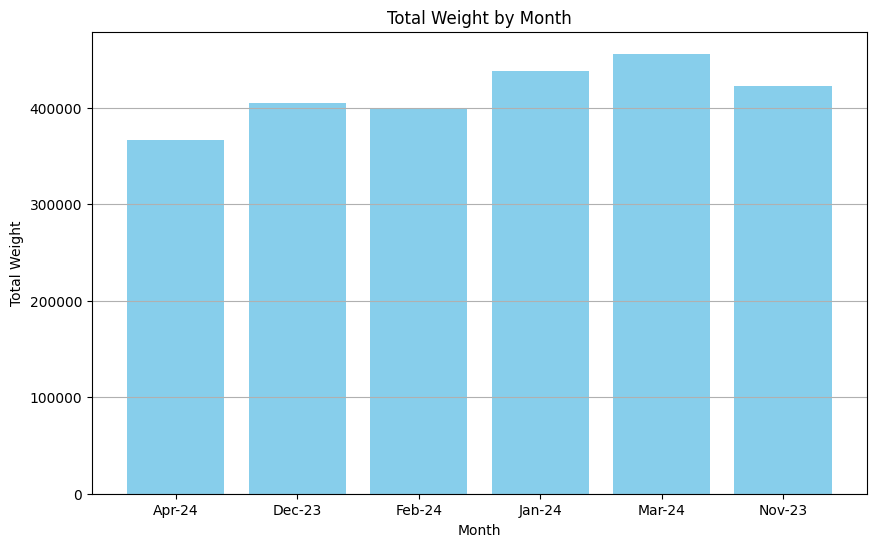

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(SLIDE_11['month'], SLIDE_11['n_wght'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Weight')
plt.title('Total Weight by Month')
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()

#### SLIDE_12

In [75]:
Summarize_PPT12 = PPT12.groupby("month").agg(
    Return_Weight = ("r_wght","sum"),
    WC = ("r_wght_wc","sum"),
    Zone_A = ("r_wght_za","sum"),
    Zone_B = ("r_wght_zb","sum"),
    Zone_C = ('r_wght_zc',"sum"),
    Wght_chrgs = ('r_wght_chrg','sum'),
    Wght_no_chrgs = ('r_wght_nchrg',"sum")
).reset_index()

In [76]:
Summarize_PPT12 = pd.pivot_table(Summarize_PPT12,columns="month",aggfunc="sum").reset_index()
Summarize_PPT12.rename(columns={"index": "Description"}, inplace=True)

In [77]:
Summarize_PPT12

month,Description,Apr-24,Dec-23,Feb-24,Jan-24,Mar-24,Nov-23
0,Return_Weight,56295.75,64643.43,54656.00,67590.81,64227.54,58931.62
1,WC,7490.35,7726.26,6161.04,7548.03,7911.85,6936.51
2,Wght_chrgs,11042.72,14101.69,11505.35,13379.00,14025.35,12648.09
3,Wght_no_chrgs,45253.03,50541.74,43150.65,54211.81,50202.19,46283.53
4,Zone_A,34079.12,38120.90,30883.85,39432.53,37210.06,34996.25
5,Zone_B,8642.43,10308.78,9207.63,11530.17,10485.13,10000.15
6,Zone_C,6083.84,8487.49,8403.48,9080.08,8620.50,6998.71


In [78]:
columns_to_sort = [col for col in Summarize_PPT12.columns if col != 'Description']
sorted_columns = sorted(columns_to_sort, key=lambda x: pd.to_datetime(x, format='%b-%y'))

# Reorder columns in Summarize_PPT9 based on sorted column names
Summarize_PPT12 = Summarize_PPT12[['Description'] + sorted_columns]

num_columns = len(Summarize_PPT12.columns)

# Use iloc to select the last three columns
last_three_columns = Summarize_PPT12.iloc[:, num_columns - 2:]

# Reset the index of the "Description" column to match the last_three_columns
description_column = Summarize_PPT12["Description"].reset_index(drop=True)

# Concatenate the "Description" column with the last_three_columns horizontally
Summarize_PPT12 = pd.concat([description_column, last_three_columns], axis=1)

TotalWeigh_2 = Summarize_PPT12.iloc[:,-1][1]
TotalWeigh_1 = Summarize_PPT12.iloc[:,1][1]

Summarize_PPT12["Apr_%"] =(Summarize_PPT12.iloc[:,-1]/TotalWeigh_2)*100
Summarize_PPT12["Mar_%"] =(Summarize_PPT12.iloc[:,1]/TotalWeigh_1)*100

Summarize_PPT12 = round(Summarize_PPT12,2)
Summarize_PPT12["INC_DEC"] = round(Summarize_PPT12.iloc[:,2] - Summarize_PPT12.iloc[:,1])

In [79]:
Summarize_PPT12

,Description,Mar-24,Apr-24,Apr_%,Mar_%,INC_DEC
0,Return_Weight,64227.54,56295.75,751.58,811.79,-7932.0
1,WC,7911.85,7490.35,100.00,100.00,-422.0
2,Wght_chrgs,14025.35,11042.72,147.43,177.27,-2983.0
3,Wght_no_chrgs,50202.19,45253.03,604.15,634.52,-4949.0
4,Zone_A,37210.06,34079.12,454.97,470.31,-3131.0
5,Zone_B,10485.13,8642.43,115.38,132.52,-1843.0
6,Zone_C,8620.50,6083.84,81.22,108.96,-2537.0


In [80]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor

def insert_table_into_existing_presentation(presentation_path, summarize_data, new_slide_layout=6):
    try:
        # Open the existing presentation
        prs = Presentation(presentation_path)

        # Add a new slide at the end (this ensures the slide is appended)
        slide_layout = prs.slide_layouts[new_slide_layout]
        slide = prs.slides.add_slide(slide_layout)

        # Define table dimensions and position (adjust as needed)
        x, y, cx, cy = Inches(0.5), Inches(1.0), Inches(9.0), Inches(5.5)

        # Add a table shape to the slide
        table = slide.shapes.add_table(rows=len(summarize_data) + 1, cols=len(summarize_data[0]), left=x, top=y, width=cx, height=cy).table

        # Populate table headers
        headers = summarize_data[0]  # First row contains headers
        for col_idx, header_text in enumerate(headers):
            cell_header = table.cell(0, col_idx)
            cell_header.text = header_text
            cell_header.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Populate table data
        for row_idx in range(1, len(summarize_data)):
            row_data = summarize_data[row_idx]
            for col_idx, cell_value in enumerate(row_data):
                cell = table.cell(row_idx, col_idx)
                cell.text = str(cell_value)  # Convert to string to handle different data types
                cell.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Apply alternating row colors and header formatting
        for idx, row in enumerate(table.rows):
            for cell in row.cells:
                if idx == 0:
                    # Header row
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
                    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
                    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
                elif idx % 2 == 0:
                    # Even row (light grey background with white font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
                else:
                    # Odd row (light grey background with black font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

        # Apply font settings to all cells (except the header row)
        for row in table.rows:
            for cell in row.cells:
                if cell != table.rows[0].cells[0]:  # Skip formatting for header row
                    cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
                    cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
                    cell.text_frame.word_wrap = True  # Enable text autofit for cells
                    cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell

        # Save the modified presentation
        prs.save(presentation_path)
        print(f"Table successfully inserted into '{presentation_path}' at the end.")

    except FileNotFoundError:
        print(f"Error: Presentation file not found at '{presentation_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


presentation_path = "C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx"

table_data = [
    ["Description", "Mar-24", "Mar-24_%", "Apr-24", "Apr-24_%", "Inc_Dec"],
    [Summarize_PPT12.iloc[:,0][0], Summarize_PPT12.iloc[:,1][0],Summarize_PPT12.iloc[:,4][0],Summarize_PPT12.iloc[:,2][0], Summarize_PPT12.iloc[:,3][0], Summarize_PPT12.iloc[0]["INC_DEC"]],
    [Summarize_PPT12.iloc[:,0][1], Summarize_PPT12.iloc[:,1][1],Summarize_PPT12.iloc[:,4][1],Summarize_PPT12.iloc[:,2][1], Summarize_PPT12.iloc[:,3][1], Summarize_PPT12.iloc[1]["INC_DEC"]],
    [Summarize_PPT12.iloc[:,0][2], Summarize_PPT12.iloc[:,1][2],Summarize_PPT12.iloc[:,4][2],Summarize_PPT12.iloc[:,2][2], Summarize_PPT12.iloc[:,3][2], Summarize_PPT12.iloc[2]["INC_DEC"]],
    [Summarize_PPT12.iloc[:,0][3], Summarize_PPT12.iloc[:,1][3],Summarize_PPT12.iloc[:,4][3],Summarize_PPT12.iloc[:,2][3], Summarize_PPT12.iloc[:,3][3], Summarize_PPT12.iloc[3]["INC_DEC"]],
    [Summarize_PPT12.iloc[:,0][4], Summarize_PPT12.iloc[:,1][4],Summarize_PPT12.iloc[:,4][4],Summarize_PPT12.iloc[:,2][4], Summarize_PPT12.iloc[:,3][4], Summarize_PPT12.iloc[4]["INC_DEC"]],
    [Summarize_PPT12.iloc[:,0][5], Summarize_PPT12.iloc[:,1][5],Summarize_PPT12.iloc[:,4][5],Summarize_PPT12.iloc[:,2][5], Summarize_PPT12.iloc[:,3][5], Summarize_PPT12.iloc[5]["INC_DEC"]],
]


insert_table_into_existing_presentation(presentation_path, table_data)  

Table successfully inserted into 'C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx' at the end.


#### PPT12_1

In [81]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.master_origin ,sr.master_dest,sr.dest_zone,sr.weight,sr.weight_band,rr.*
                     FROM blueex.salesreport sr 
                     JOIN blueex.returnreport rr
                     ON sr.normal_cn = rr.normal_cn
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [82]:
PPT12_1 = df.copy()

In [83]:
PPT12_1['normal_cn_date'] = pd.to_datetime(PPT12_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT12_1["Month_year"] = PPT12_1['normal_cn_date'].dt.strftime('%b-%Y')

In [84]:
PPT12_1_GROUP = (
    PPT12_1.groupby(["Month_year", "master_dest"])["weight"]
    .sum()
    .reset_index(name="SumOfWght")  # Resetting index and naming the count column
)

# Creating an empty DataFrame to store the top 10 values per month
top_values_by_month = pd.DataFrame()

# Iterating over each month in the grouped DataFrame
for month in PPT12_1_GROUP["Month_year"].unique():
    # Filtering data for the current month
    month_data =PPT12_1_GROUP[PPT12_1_GROUP["Month_year"] == month]
    
    # Finding the top 10 values for this month based on count
    top_values = month_data.nlargest(10, "SumOfWght")
    
    # Appending the top values for this month to the result DataFrame
    top_values_by_month = pd.concat([top_values_by_month, top_values])

# Resetting the index of the result DataFrame
top_values_by_month = top_values_by_month.reset_index(drop=True)

Slide_12  = pd.pivot_table(top_values_by_month,index="master_dest",columns="Month_year",values="SumOfWght").reset_index().fillna(0)

Slide_12["Apr_%"] = round((Slide_12["Apr-2024"]/Summarize_PPT12.iloc[0]["Apr-24"])*100,2)

Slide_12["Mar_%"] = round((Slide_12["Mar-2024"]/Summarize_PPT12.iloc[0]["Mar-24"])*100,2)
Slide_12["INC_DEC"] = Slide_12["Apr-2024"] - Slide_12['Mar-2024']

Slide_12 = Slide_12.sort_values(by ="Apr-2024",ascending = False)

Slide_12 = round(Slide_12,2)

In [85]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor

def insert_table_into_existing_presentation(presentation_path, summarize_data, new_slide_layout=6):
    try:
        # Open the existing presentation
        prs = Presentation(presentation_path)

        # Add a new slide at the end (this ensures the slide is appended)
        slide_layout = prs.slide_layouts[new_slide_layout]
        slide = prs.slides.add_slide(slide_layout)

        # Define table dimensions and position (adjust as needed)
        x, y, cx, cy = Inches(0.5), Inches(1.0), Inches(9.0), Inches(5.5)

        # Add a table shape to the slide
        table = slide.shapes.add_table(rows=len(summarize_data) + 1, cols=len(summarize_data[0]), left=x, top=y, width=cx, height=cy).table

        # Populate table headers
        headers = summarize_data[0]  # First row contains headers
        for col_idx, header_text in enumerate(headers):
            cell_header = table.cell(0, col_idx)
            cell_header.text = header_text
            cell_header.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Populate table data
        for row_idx in range(1, len(summarize_data)):
            row_data = summarize_data[row_idx]
            for col_idx, cell_value in enumerate(row_data):
                cell = table.cell(row_idx, col_idx)
                cell.text = str(cell_value)  # Convert to string to handle different data types
                cell.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Apply alternating row colors and header formatting
        for idx, row in enumerate(table.rows):
            for cell in row.cells:
                if idx == 0:
                    # Header row
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
                    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
                    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
                elif idx % 2 == 0:
                    # Even row (light grey background with white font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
                else:
                    # Odd row (light grey background with black font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

        # Apply font settings to all cells (except the header row)
        for row in table.rows:
            for cell in row.cells:
                if cell != table.rows[0].cells[0]:  # Skip formatting for header row
                    cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
                    cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
                    cell.text_frame.word_wrap = True  # Enable text autofit for cells
                    cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell

        # Save the modified presentation
        prs.save(presentation_path)
        print(f"Table successfully inserted into '{presentation_path}' at the end.")

    except FileNotFoundError:
        print(f"Error: Presentation file not found at '{presentation_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


presentation_path = "C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx"
table_data = [
    ["Destination", "Mar-24", "Mar-24_%", "Apr-24", "Apr-24_%", "Inc_Dec"],
    [Slide_12.iloc[0]["master_dest"], Slide_12.iloc[0]["Mar-2024"], Slide_12.iloc[0]["Mar_%"], Slide_12.iloc[0]["Apr-2024"], Slide_12.iloc[0]["Apr_%"], Slide_12.iloc[0]["INC_DEC"]],
    [Slide_12.iloc[1]["master_dest"], Slide_12.iloc[1]["Mar-2024"], Slide_12.iloc[1]["Mar_%"], Slide_12.iloc[1]["Apr-2024"], Slide_12.iloc[1]["Apr_%"], Slide_12.iloc[1]["INC_DEC"]],
    [Slide_12.iloc[2]["master_dest"], Slide_12.iloc[2]["Mar-2024"], Slide_12.iloc[2]["Mar_%"], Slide_12.iloc[2]["Apr-2024"], Slide_12.iloc[2]["Apr_%"], Slide_12.iloc[2]["INC_DEC"]],
    [Slide_12.iloc[3]["master_dest"], Slide_12.iloc[3]["Mar-2024"], Slide_12.iloc[3]["Mar_%"], Slide_12.iloc[3]["Apr-2024"], Slide_12.iloc[3]["Apr_%"], Slide_12.iloc[3]["INC_DEC"]],
    [Slide_12.iloc[4]["master_dest"], Slide_12.iloc[4]["Mar-2024"], Slide_12.iloc[4]["Mar_%"], Slide_12.iloc[4]["Apr-2024"], Slide_12.iloc[4]["Apr_%"], Slide_12.iloc[4]["INC_DEC"]],
    [Slide_12.iloc[5]["master_dest"], Slide_12.iloc[5]["Mar-2024"], Slide_12.iloc[5]["Mar_%"], Slide_12.iloc[5]["Apr-2024"], Slide_12.iloc[5]["Apr_%"], Slide_12.iloc[5]["INC_DEC"]],
    [Slide_12.iloc[6]["master_dest"], Slide_12.iloc[6]["Mar-2024"], Slide_12.iloc[6]["Mar_%"], Slide_12.iloc[6]["Apr-2024"], Slide_12.iloc[6]["Apr_%"], Slide_12.iloc[6]["INC_DEC"]],
    [Slide_12.iloc[7]["master_dest"], Slide_12.iloc[7]["Mar-2024"], Slide_12.iloc[7]["Mar_%"], Slide_12.iloc[7]["Apr-2024"], Slide_12.iloc[7]["Apr_%"], Slide_12.iloc[7]["INC_DEC"]],
    [Slide_12.iloc[8]["master_dest"], Slide_12.iloc[8]["Mar-2024"], Slide_12.iloc[8]["Mar_%"], Slide_12.iloc[8]["Apr-2024"], Slide_12.iloc[8]["Apr_%"], Slide_12.iloc[8]["INC_DEC"]],
    [Slide_12.iloc[9]["master_dest"], Slide_12.iloc[9]["Mar-2024"], Slide_12.iloc[9]["Mar_%"], Slide_12.iloc[9]["Apr-2024"], Slide_12.iloc[9]["Apr_%"], Slide_12.iloc[9]["INC_DEC"]],
    [Slide_12.iloc[10]["master_dest"],Slide_12.iloc[10]["Mar-2024"],Slide_12.iloc[10]["Mar_%"],Slide_12.iloc[10]["Apr-2024"],Slide_12.iloc[10]["Apr_%"],Slide_12.iloc[10]["INC_DEC"]]
]


insert_table_into_existing_presentation(presentation_path, table_data)


Table successfully inserted into 'C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx' at the end.


#### SLIDE_13

In [86]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.*
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [87]:
PPT13 = df.copy()

In [88]:
PPT13['dest_zone_type'] = PPT13.apply(lambda row: 'WC' if row['origin'] == row['dest'] else row['dest_zone'], axis=1)

In [89]:
PPT13['normal_cn_date'] = pd.to_datetime(PPT13['normal_cn_date'])
PPT13["Month_year"] = PPT13['normal_cn_date'].dt.strftime('%b-%Y')


In [90]:
Total_WghtChgs = PPT13.groupby("Month_year").agg(
    total_Weight_chgs = ("normal_weight_charges","sum")
).reset_index()

Total_WghtChgs["dest_zone_type"] = "Normal Weight Charges"

In [91]:
pivot_PPT13 = pd.pivot_table(PPT13,index = "dest_zone_type",columns = "Month_year",values = "normal_weight_charges",aggfunc = "sum").reset_index()

In [92]:
pivot_PPT13_Total = pd.pivot_table(Total_WghtChgs,index="dest_zone_type",columns="Month_year",values="total_Weight_chgs").reset_index()

In [93]:
pivot_PPT13 = pd.merge(pivot_PPT13,pivot_PPT13_Total,on = ["dest_zone_type","Apr-2024","Mar-2024"],how="outer")

In [94]:
normal_charge_row = pivot_PPT13[pivot_PPT13['dest_zone_type'] == 'Normal Weight Charges']

# Extract the Normal_charge values for each month (assuming columns are month-year format)
normal_charge_values = normal_charge_row.iloc[:, 1:].values.flatten()

# Define the number of working days for each month in a dictionary
working_days = {
    'Mar-2024': 23,  # Number of working days in March
    'Apr-2024': 22   # Number of working days in April
}

# Calculate daily Normal charge for each month
daily_normal_charge = normal_charge_values / [working_days[col] for col in normal_charge_row.columns[1:]]

# Create a new row for 'Daily Normal Charge' and append to the dataframe
daily_normal_charge_row = ['Daily Normal Charge'] + list(daily_normal_charge)
pivot_PPT13.loc[len(pivot_PPT13)] = daily_normal_charge_row

In [95]:
TotalWeigh_2 = pivot_PPT13.iloc[:,-1][4]
TotalWeigh_1 = pivot_PPT13.iloc[:,1][4]

In [96]:
TotalWeigh_2

77235612.776

In [97]:

pivot_PPT13["Mar_%"] =(pivot_PPT13.iloc[:,-1]/TotalWeigh_2)*100
pivot_PPT13["Apr_%"] =(pivot_PPT13.iloc[:,1]/TotalWeigh_1)*100

pivot_PPT13 = round(pivot_PPT13,2)
pivot_PPT13["INC_DEC"] = round(pivot_PPT13.iloc[:,2] - pivot_PPT13.iloc[:,1])

In [98]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.dml.color import RGBColor

def insert_table_into_existing_presentation(presentation_path, summarize_data, new_slide_layout=6):
    try:
        # Open the existing presentation
        prs = Presentation(presentation_path)

        # Add a new slide at the end (this ensures the slide is appended)
        slide_layout = prs.slide_layouts[new_slide_layout]
        slide = prs.slides.add_slide(slide_layout)

        # Define table dimensions and position (adjust as needed)
        x, y, cx, cy = Inches(0.5), Inches(1.0), Inches(9.0), Inches(5.5)

        # Add a table shape to the slide
        table = slide.shapes.add_table(rows=len(summarize_data) + 1, cols=len(summarize_data[0]), left=x, top=y, width=cx, height=cy).table

        # Populate table headers
        headers = summarize_data[0]  # First row contains headers
        for col_idx, header_text in enumerate(headers):
            cell_header = table.cell(0, col_idx)
            cell_header.text = header_text
            cell_header.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Populate table data
        for row_idx in range(1, len(summarize_data)):
            row_data = summarize_data[row_idx]
            for col_idx, cell_value in enumerate(row_data):
                cell = table.cell(row_idx, col_idx)
                cell.text = str(cell_value)  # Convert to string to handle different data types
                cell.text_frame.paragraphs[0].font.size = Pt(10)  # Set font size to 10 points

        # Apply alternating row colors and header formatting
        for idx, row in enumerate(table.rows):
            for cell in row.cells:
                if idx == 0:
                    # Header row
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)
                    cell.text_frame.paragraphs[0].font.size = Pt(12)  # Set font size for header row
                    cell.text_frame.paragraphs[0].font.bold = True  # Make font bold for header row
                elif idx % 2 == 0:
                    # Even row (light grey background with white font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(230, 230, 230)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)  # Black font color (RGB)
                else:
                    # Odd row (light grey background with black font)
                    cell.fill.solid()
                    cell.fill.fore_color.rgb = RGBColor(54, 54, 54)  # Light grey color (RGB)
                    cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)  # White font color (RGB)

        # Apply font settings to all cells (except the header row)
        for row in table.rows:
            for cell in row.cells:
                if cell != table.rows[0].cells[0]:  # Skip formatting for header row
                    cell.text_frame.paragraphs[0].font.name = "Roboto"  # Set font to Roboto
                    cell.text_frame.paragraphs[0].font.size = Pt(9)  # Set font size to 9 points
                    cell.text_frame.word_wrap = True  # Enable text autofit for cells
                    cell.text_frame.auto_size = True  # Automatically adjust text size to fit the cell

        # Save the modified presentation
        prs.save(presentation_path)
        print(f"Table successfully inserted into '{presentation_path}' at the end.")

    except FileNotFoundError:
        print(f"Error: Presentation file not found at '{presentation_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


presentation_path = "C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx"

table_data = [
    ["Description", 'Apr-2024', 'Apr_%', 'Mar_2024', 'Mar_%', 'INC_DEC'],
    [pivot_PPT13.iloc[:,0][0], pivot_PPT13.iloc[:,1][0],pivot_PPT13.iloc[:,4][0],pivot_PPT13.iloc[:,2][0], pivot_PPT13.iloc[:,3][0], pivot_PPT13.iloc[0]["INC_DEC"]],
    [pivot_PPT13.iloc[:,0][1], pivot_PPT13.iloc[:,1][1],pivot_PPT13.iloc[:,4][1],pivot_PPT13.iloc[:,2][1], pivot_PPT13.iloc[:,3][1], pivot_PPT13.iloc[1]["INC_DEC"]],
    [pivot_PPT13.iloc[:,0][2], pivot_PPT13.iloc[:,1][2],pivot_PPT13.iloc[:,4][2],pivot_PPT13.iloc[:,2][2], pivot_PPT13.iloc[:,3][2], pivot_PPT13.iloc[2]["INC_DEC"]],
    [pivot_PPT13.iloc[:,0][3], pivot_PPT13.iloc[:,1][3],pivot_PPT13.iloc[:,4][3],pivot_PPT13.iloc[:,2][3], pivot_PPT13.iloc[:,3][3], pivot_PPT13.iloc[3]["INC_DEC"]],
    [pivot_PPT13.iloc[:,0][4], pivot_PPT13.iloc[:,1][4],pivot_PPT13.iloc[:,4][4],pivot_PPT13.iloc[:,2][4], pivot_PPT13.iloc[:,3][4], pivot_PPT13.iloc[4]["INC_DEC"]],
    [pivot_PPT13.iloc[:,0][5], pivot_PPT13.iloc[:,1][5],pivot_PPT13.iloc[:,4][5],pivot_PPT13.iloc[:,2][5], pivot_PPT13.iloc[:,3][5], pivot_PPT13.iloc[5]["INC_DEC"]],
]


insert_table_into_existing_presentation(presentation_path, table_data)  

Table successfully inserted into 'C:/Users/Pc/Desktop/BLUEX WORKINGS/AUTOMATION/formatted_presentation.pptx' at the end.


#### PPT13_1

In [99]:
PPT13.columns

Index(['normal_cn', 'normal_cn_date', 'acc_no', 'sp_name', 'origin',
       'master_origin', 'dest', 'master_dest', 'dest_zone', 'serv',
       'weight_band', 'weight', 'normal_weight_charges',
       'normal_other_charges', 'normal_fsc', 'normal_revenue', 'cod',
       'dest_zone_type', 'Month_year'],
      dtype='object')

In [100]:
PPT13_1_GROUP = (
    PPT13.groupby(["Month_year", "master_dest","dest_zone"])['normal_weight_charges']
    .sum()
    .reset_index(name="nW_Total")  # Resetting index and naming the count column
)
PPT13_1_GROUP = pd.pivot_table(PPT13_1_GROUP,index=["master_dest","Month_year"],columns="dest_zone",values="nW_Total",aggfunc="sum").reset_index()

In [101]:
def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['A'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='A')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(PPT13_1_GROUP)

top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C"]).fillna(0).reset_index()   
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('A', 'Apr-2024'), ascending=False)

In [102]:
sorted_top_values["TotalApr"] = round(sorted_top_values["A"]["Apr-2024"] + sorted_top_values["B"]["Apr-2024"] + sorted_top_values["C"]["Apr-2024"],2)
sorted_top_values["TotalMar"] = round(sorted_top_values["A"]["Mar-2024"] + sorted_top_values["B"]["Mar-2024"] + sorted_top_values["C"]["Mar-2024"],2)

In [103]:
sorted_top_values["%_age_Apr"] = round((sorted_top_values["TotalApr"]/TotalWeigh_1),2)*100
sorted_top_values["%_age_Marr"] = round((sorted_top_values["TotalMar"]/TotalWeigh_2),2)*100

In [104]:
PPT13_1 = sorted_top_values

#### SLIDE_14

In [105]:
PPT14_GROUP = PPT14.groupby("month")['n_wght_chgs'].sum().reset_index()

In [106]:
PPT14_GROUP['month'] = pd.to_datetime(PPT14_GROUP['month'], format='%b-%y')

# Sort dataframe based on the Month column
PPT14_GROUP = PPT14_GROUP.sort_values('month')

# Reformat Month column back to the desired format (e.g., 'Apr-24')
PPT14_GROUP['month'] = PPT14_GROUP['month'].dt.strftime('%b-%y')

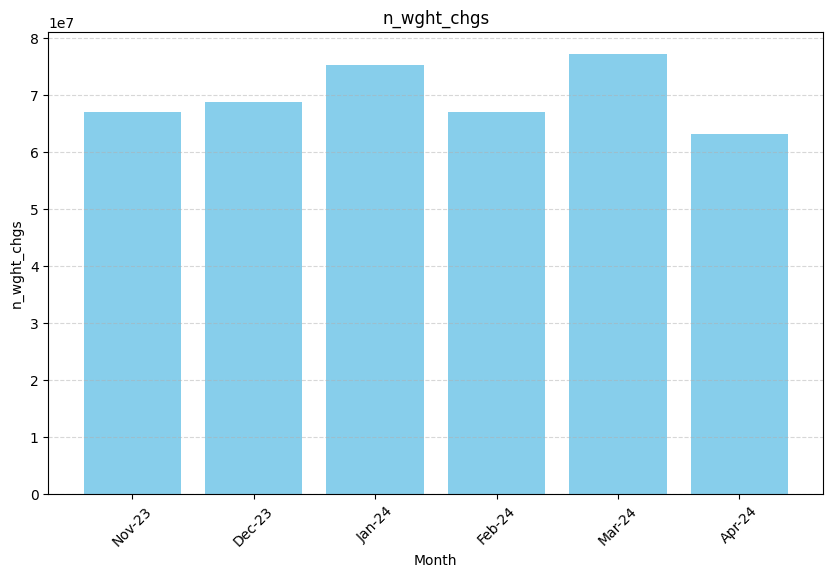

In [107]:
plt.figure(figsize=(10, 6))
plt.bar(PPT14_GROUP['month'], PPT14_GROUP['n_wght_chgs'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('n_wght_chgs')
plt.title('n_wght_chgs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### SLIDE_17

In [108]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.*
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [109]:
## 
PPT17 = df.copy()


In [110]:
PPT17['dest_zone_type'] = PPT17.apply(lambda row: 'WC' if row['origin'] == row['dest'] else row['dest_zone'], axis=1)
PPT17['normal_cn_date'] = pd.to_datetime(PPT17['normal_cn_date'])
PPT17["Month_year"] = PPT17['normal_cn_date'].dt.strftime('%b-%Y')
Total_WghtChgs = PPT17.groupby("Month_year").agg(
    total_Weight_chgs = ("normal_revenue","sum")
).reset_index()


In [111]:
Total_WghtChgs["dest_zone_type"] = "normal_revenue"


In [112]:
pivot_PPT17 = pd.pivot_table(PPT17,index = "dest_zone_type",columns = "Month_year",values = "normal_weight_charges",aggfunc = "sum").reset_index()
pivot_PPT17_Total = pd.pivot_table(Total_WghtChgs,index="dest_zone_type",columns="Month_year",values="total_Weight_chgs").reset_index()

pivot_PPT17 = pd.merge(pivot_PPT17,pivot_PPT17_Total,on = ["dest_zone_type","Apr-2024","Mar-2024"],how="outer")


In [113]:
cod = PPT17[PPT17["cod"]!=0.0]
Ncod = PPT17[PPT17["cod"]==0.0]
cod = cod.groupby(["Month_year"])["normal_revenue"].sum().reset_index()
Ncod = Ncod.groupby(["Month_year"])["normal_revenue"].sum().reset_index()
cod["dest_zone_type"] = "Total Revenue - COD"
Ncod["dest_zone_type"] = "Total Revenue - NCOD"
pivot_cod = pd.pivot_table(cod,index="dest_zone_type",columns="Month_year",values="normal_revenue").reset_index()
pivot_Ncod = pd.pivot_table(Ncod,index="dest_zone_type",columns="Month_year",values="normal_revenue").reset_index()
pivot_PPT17 = pd.merge(pivot_PPT17,pivot_cod,on = ["dest_zone_type","Apr-2024","Mar-2024"],how="outer")
pivot_PPT17 = pd.merge(pivot_PPT17,pivot_Ncod,on = ["dest_zone_type","Apr-2024","Mar-2024"],how="outer")


In [114]:
normal_charge_row = pivot_PPT17[pivot_PPT17['dest_zone_type'] == 'normal_revenue']
normal_charge_values = normal_charge_row.iloc[:, 1:].values.flatten()

# Define the number of working days for each month in a dictionary
working_days = {
    'Mar-2024': 23,  # Number of working days in March
    'Apr-2024': 22   # Number of working days in April
}

# Calculate daily Normal charge for each month
daily_normal_charge = normal_charge_values / [working_days[col] for col in normal_charge_row.columns[1:]]

# Create a new row for 'Daily Normal Charge' and append to the dataframe
daily_normal_charge_row = ['Daily Normal Charge'] + list(daily_normal_charge)
pivot_PPT17.loc[len(pivot_PPT17)] = daily_normal_charge_row

TotalWeigh_2 = pivot_PPT17.iloc[:,-1][4]
TotalWeigh_1 = pivot_PPT17.iloc[:,1][4]


pivot_PPT17["Mar_%"] =(pivot_PPT17.iloc[:,-1]/TotalWeigh_2)*100
pivot_PPT17["Apr_%"] =(pivot_PPT17.iloc[:,1]/TotalWeigh_1)*100

pivot_PPT17 = round(pivot_PPT17,2)
pivot_PPT17["INC_DEC"] = round(pivot_PPT17.iloc[:,2] - pivot_PPT17.iloc[:,1])

#### SLIDE_17_1

In [115]:
#
PPT17_1_GROUP = (
    PPT17.groupby(["Month_year", "master_dest","dest_zone"])['normal_revenue']
    .sum()
    .reset_index(name="nR_Total")  # Resetting index and naming the count column
)
PPT17_1_GROUP = pd.pivot_table(PPT17_1_GROUP,index=["master_dest","Month_year"],columns="dest_zone",values="nR_Total",aggfunc="sum").reset_index()

def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['A'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='A')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(PPT17_1_GROUP)

top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C"]).fillna(0).reset_index()   
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('A', 'Apr-2024'), ascending=False)

sorted_top_values["TotalApr"] = round(sorted_top_values["A"]["Apr-2024"] + sorted_top_values["B"]["Apr-2024"] + sorted_top_values["C"]["Apr-2024"],2)
sorted_top_values["TotalMar"] = round(sorted_top_values["A"]["Mar-2024"] + sorted_top_values["B"]["Mar-2024"] + sorted_top_values["C"]["Mar-2024"],2)

sorted_top_values["%_age_Apr"] = round((sorted_top_values["TotalApr"]/TotalWeigh_1),2)*100
sorted_top_values["%_age_Marr"] = round((sorted_top_values["TotalMar"]/TotalWeigh_2),2)*100

PPT17_1 = sorted_top_values

#### SLIDE_18

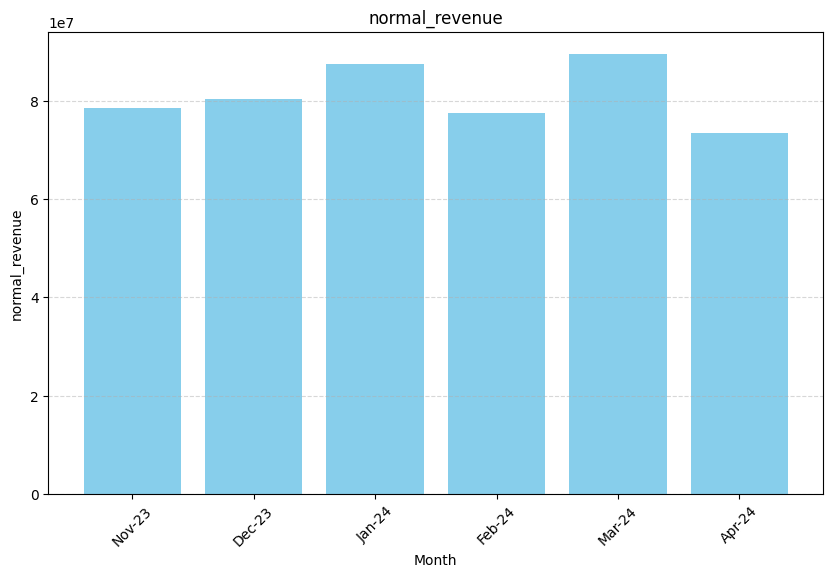

In [116]:

PPT18_GROUP = PPT18.groupby("month")['n_rev'].sum().reset_index()

PPT18_GROUP['month'] = pd.to_datetime(PPT18_GROUP['month'], format='%b-%y')

# Sort dataframe based on the Month column
PPT18_GROUP = PPT18_GROUP.sort_values('month')

# Reformat Month column back to the desired format (e.g., 'Apr-24')
PPT18_GROUP['month'] = PPT18_GROUP['month'].dt.strftime('%b-%y')

plt.figure(figsize=(10, 6))
plt.bar(PPT18_GROUP['month'], PPT18_GROUP['n_rev'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('normal_revenue')
plt.title('normal_revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### SLIDE_19

In [117]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """select salesreport.master_dest,salesreport.normal_cn_date ,SUM(salesreport.origin=salesreport.dest) AS n_s_wc,
                  SUM(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A') AS n_s_za,
                  SUM(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B') AS n_s_zb,
                  SUM(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C') AS n_s_zc,
                  SUM(IF(salesreport.origin=salesreport.dest and returnreport.return_cn!='', 1, 0)) AS r_s_wc,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A' and returnreport.return_cn!='', 1, 0)) AS r_s_za,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B' and returnreport.return_cn!='', 1, 0)) AS r_s_zb,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C' and returnreport.return_cn!='', 1, 0)) AS r_s_zc,
                  SUM(IF(salesreport.origin=salesreport.dest, salesreport.weight, 0)) AS n_wght_wc,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A', salesreport.weight, 0)) AS n_wght_za,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B', salesreport.weight, 0)) AS n_wght_zb,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C', salesreport.weight, 0)) AS n_wght_zc,
                  SUM(IF(salesreport.origin=salesreport.dest and returnreport.return_cn!='', salesreport.weight, 0)) AS r_wght_wc,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A' and returnreport.return_cn!='', salesreport.weight, 0)) AS r_wght_za,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B' and returnreport.return_cn!='', salesreport.weight, 0)) AS r_wght_zb,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C' and returnreport.return_cn!='', salesreport.weight, 0)) AS r_wght_zc,
                  SUM(IF(salesreport.origin=salesreport.dest, salesreport.normal_weight_charges, 0)) AS n_wght_chgs_wc,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A', salesreport.normal_weight_charges, 0)) AS n_wght_chgs_za,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B', salesreport.normal_weight_charges, 0)) AS n_wght_chgs_zb,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C', salesreport.normal_weight_charges, 0)) AS n_wght_chgs_zc,
                  SUM(IF(salesreport.origin=salesreport.dest, salesreport.normal_revenue, 0)) AS n_rev_wc,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A', salesreport.normal_revenue, 0)) AS n_rev_za,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B', salesreport.normal_revenue, 0)) AS n_rev_zb,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C', salesreport.normal_revenue, 0)) AS n_rev_zc,
                  SUM(IF(salesreport.origin=salesreport.dest and returnreport.return_cn!='', returnreport.return_weight_charges, 0)) AS r_rev_wc,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='A' and returnreport.return_cn!='', returnreport.return_weight_charges, 0)) AS r_rev_za,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='B' and returnreport.return_cn!='', returnreport.return_weight_charges, 0)) AS r_rev_zb,
                  SUM(IF(salesreport.origin!=salesreport.dest and salesreport.dest_zone='C' and returnreport.return_cn!='', returnreport.return_weight_charges, 0)) AS r_rev_zc

                  from blueex.salesreport 
                  left join blueex.returnreport 
                  on returnreport.normal_cn = salesreport.normal_cn
                  where salesreport.normal_cn_date between %s and %s
                  group by salesreport.master_dest,salesreport.normal_cn_date
                  order by SUM(salesreport.origin=salesreport.dest) desc;"""
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [118]:
PPT19 = df.copy()

In [119]:
PPT19['normal_cn_date'] = pd.to_datetime(PPT19['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT19["Month_year"] = PPT19['normal_cn_date'].dt.strftime('%b-%Y')

In [120]:
Total_ret_rev = PPT19.groupby(["Month_year"])[['r_rev_wc', 'r_rev_za', 'r_rev_zb', 'r_rev_zc']].sum().reset_index()

In [121]:
Total_ret_rev["Total_Ret_Revenue"] = Total_ret_rev["r_rev_wc"]+Total_ret_rev["r_rev_za"]+Total_ret_rev["r_rev_zb"]+Total_ret_rev["r_rev_zc"]

In [122]:
Summarize_PPT19 = PPT19.groupby("Month_year").agg(
    WC = ("r_rev_wc","sum"),
    Zone_A = ('r_rev_za',"sum"),
    Zone_B = ('r_rev_zb',"sum"),
    Zone_C = ('r_rev_zc',"sum"),
).reset_index()


if isinstance(Total_ret_rev["Total_Ret_Revenue"], pd.Series):
    Total_ret_rev = Total_ret_rev["Total_Ret_Revenue"].to_frame()

# Concatenate along columns
Summarize_PPT19 = pd.concat([Summarize_PPT19, Total_ret_rev["Total_Ret_Revenue"]], axis=1)



In [123]:
Summarize_PPT19 = pd.pivot_table(
    Summarize_PPT19,
    values=['WC', 'Zone_A', 'Zone_B', 'Zone_C', 'Total_Ret_Revenue'],
    index=[],
    columns=['Month_year']
)

In [124]:
Apr_Total_Rev = Summarize_PPT19.iloc[:,0][0]
Mar_Total_Rev = Summarize_PPT19.iloc[:,1][0]

In [125]:
Summarize_PPT19["Apr_%"] = round((Summarize_PPT19["Apr-2024"]/Apr_Total_Rev)*100,2)
Summarize_PPT19["Mar_%"] = round((Summarize_PPT19["Mar-2024"]/Mar_Total_Rev)*100,2)

In [126]:
Summarize_PPT19["INC_DEC"] = Summarize_PPT19.iloc[:,0] - Summarize_PPT19.iloc[:,1]

In [127]:
#Slide_19_1
PPT19_Group = PPT19.groupby(["master_dest","Month_year"])[['r_rev_wc', 'r_rev_za', 'r_rev_zb', 'r_rev_zc']].sum().reset_index()

In [128]:
PPT19_Group.columns

Index(['master_dest', 'Month_year', 'r_rev_wc', 'r_rev_za', 'r_rev_zb',
       'r_rev_zc'],
      dtype='object')

In [129]:
PPT19_Group["Total_ret_rev"] = PPT19_Group['r_rev_wc'] + PPT19_Group['r_rev_za'] + PPT19_Group['r_rev_zb'] + PPT19_Group['r_rev_zc']

In [130]:
PPT19_Group = pd.pivot_table(PPT19_Group,index=["master_dest","Month_year"],values="Total_ret_rev",aggfunc="sum").reset_index()


In [131]:
PPT19_Group = pd.pivot_table(PPT19_Group,index="master_dest",columns="Month_year",values="Total_ret_rev",aggfunc="sum").reset_index()


In [132]:
PPT19_Group = PPT19_Group.sort_values(by="Apr-2024",ascending=False).head(10)

#### SLIDE_21

In [133]:
def calc_rps_ex_fsc(n_rev, n_fsc, shipments):
    return (n_rev.sum() - n_fsc.sum()) / shipments.sum()

def calc_rps_ex_chc(n_rev, n_oth_chgs, shipments):
    return (n_rev.sum() - n_oth_chgs.sum()) / shipments.sum()


RPS_TOTAL = PPT21.groupby("month").apply(
    lambda df: pd.Series({
        "RPS": df["n_rev"].sum() / df["shipments"].sum(),
        "RPS_EX_FSC": calc_rps_ex_fsc(df["n_rev"], df["n_fsc"], df["shipments"]),
        "RPS_EX_CHC": calc_rps_ex_chc(df["n_rev"],df["n_oth_chgs"], df["shipments"]),
        "RPS_COD": df[df["cod"] != 0.0]["n_rev"].sum() / df[df["cod"] != 0.0]["shipments"].sum(),
        "RPS_NCOD": df[df["cod"] == 0.0]["n_rev"].sum() / df[df["cod"] == 0.0]["shipments"].sum(),
        "RPS_wc": df["n_rev_wc"].sum() / df["n_s_wc"].sum(),
        "RPS_za": df["n_rev_za"].sum() / df["n_s_za"].sum(),
        "RPS_zb": df["n_rev_zb"].sum() / df["n_s_zb"].sum(),
        "RPS_zc": df["n_rev_zc"].sum() / df["n_s_zc"].sum()
    })
)

PPT21_Group = round(RPS_TOTAL.reset_index(),2)


In [134]:
PPT21_Group

,month,RPS,RPS_EX_FSC,RPS_EX_CHC,RPS_COD,RPS_NCOD,RPS_wc,RPS_za,RPS_zb,RPS_zc
0,Apr-24,208.75,185.10,203.06,206.86,684.63,156.53,212.04,223.62,277.24
1,Dec-23,208.38,184.21,202.50,207.15,479.31,158.61,209.05,223.87,278.80
2,Feb-24,217.82,194.17,211.82,211.91,1380.72,160.89,219.99,225.04,280.69
3,Jan-24,210.12,186.16,204.70,209.90,261.60,156.48,209.17,226.64,280.21
4,Mar-24,213.21,189.49,207.61,211.42,581.78,157.65,213.54,226.87,281.22
5,Nov-23,209.44,185.13,202.98,208.01,669.40,154.75,210.77,227.40,286.72


In [135]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.*
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [136]:
PPT21_1 = df.copy()
PPT21_1['normal_cn_date'] = pd.to_datetime(PPT21_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT21_1["Month_year"] = PPT21_1['normal_cn_date'].dt.strftime('%b-%Y')

PPT21_1['dest_zone_type'] = PPT21_1.apply(lambda row: 'WC' if row['origin'] == row['dest'] else row['dest_zone'], axis=1)

Grouped_PPT21_1 = PPT21_1.groupby(["Month_year","master_dest","dest_zone_type"]).agg(
    Normal_rev = ("normal_revenue","sum"),
    Shipments = ("normal_cn","count")

).reset_index()

Total_Grouped_PPT21_1 = PPT21_1.groupby(["Month_year", "master_dest"]).agg(
    Normal_rev=("normal_revenue", "sum"),
    Shipments=("normal_cn", "count")
).reset_index()

# Calculate RPS (Revenue Per Shipment) after aggregation
Total_Grouped_PPT21_1["RPS"] = Total_Grouped_PPT21_1["Normal_rev"] / Total_Grouped_PPT21_1["Shipments"]

Grouped_PPT21_1["RPS"] = Grouped_PPT21_1["Normal_rev"]/Grouped_PPT21_1["Shipments"]

Grouped_PPT21_1 = pd.pivot_table(Grouped_PPT21_1,index=["master_dest","Month_year"],columns="dest_zone_type",values="RPS",aggfunc="sum").reset_index()

Grouped_PPT21_1 = pd.merge(Total_Grouped_PPT21_1,Grouped_PPT21_1,on = ["master_dest","Month_year"],how = "outer")

def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['RPS'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='RPS')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(Grouped_PPT21_1)

top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C","WC","RPS"]).fillna(0).reset_index()   
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('RPS', 'Apr-2024'), ascending=False)

PPT21_1 = round(sorted_top_values,2)

#### SLIDE_24

In [142]:

# Assuming PPT24 is your DataFrame

def calc_rps_ex_fsc(n_rev, n_fsc, n_wght):
    return (n_rev.sum() - n_fsc.sum()) / n_wght.sum()

def calc_rps_ex_chc(n_rev, n_oth_chgs, n_wght):
    return (n_rev.sum() - n_oth_chgs.sum()) / n_wght.sum()

RPS_TOTAL = PPT24.groupby("month").apply(
    lambda df: pd.Series({
        "RPW": df["n_rev"].sum() / df["n_wght"].sum(),
        "RPW_EX_FSC": calc_rps_ex_fsc(df["n_rev"], df["n_fsc"], df["n_wght"]),
        "RPW_EX_CHC": calc_rps_ex_chc(df["n_rev"], df["n_oth_chgs"], df["n_wght"]),
        "RPW_wc": df["n_rev_wc"].sum() / df["n_wght_wc"].sum(),
        "RPW_za": df["n_rev_za"].sum() / df["n_wght_za"].sum(),
        "RPW_zb": df["n_rev_zb"].sum() / df["n_wght_zb"].sum(),
        "RPW_zc": df["n_rev_zc"].sum() / df["n_wght_zc"].sum()  # Assuming you meant to use n_wght_zc
    })
)

PPT24_Group = round(RPS_TOTAL.reset_index(), 2)



### PPT24_1

In [145]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.*
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [153]:
PPT24_1 = df.copy()
PPT24_1['normal_cn_date'] = pd.to_datetime(PPT24_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT24_1["Month_year"] = PPT24_1['normal_cn_date'].dt.strftime('%b-%Y')

PPT24_1['dest_zone_type'] = PPT24_1.apply(lambda row: 'WC' if row['origin'] == row['dest'] else row['dest_zone'], axis=1)

Grouped_PPT24_1 = PPT24_1.groupby(["Month_year","master_dest","dest_zone_type"]).agg(
    Normal_rev = ("normal_revenue","sum"),
    Wght=("weight", "sum")

).reset_index()

Total_Grouped_PPT24_1 = PPT24_1.groupby(["Month_year", "master_dest"]).agg(
    Normal_rev=("normal_revenue", "sum"),
    Wght=("weight", "sum")
).reset_index()

# Calculate RPS (Revenue Per Shipment) after aggregation
Total_Grouped_PPT24_1["RPW"] = Total_Grouped_PPT24_1["Normal_rev"] / Total_Grouped_PPT24_1["Wght"]

Grouped_PPT24_1["RPW"] = Grouped_PPT24_1["Normal_rev"]/Grouped_PPT24_1["Wght"]

Grouped_PPT24_1 = pd.pivot_table(Grouped_PPT24_1,index=["master_dest","Month_year"],columns="dest_zone_type",values="RPW",aggfunc="sum").reset_index()

Grouped_PPT24_1 = pd.merge(Total_Grouped_PPT24_1,Grouped_PPT24_1,on = ["master_dest","Month_year"],how = "outer")

def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['RPW'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='RPW')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(Grouped_PPT24_1)

top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C","WC","RPW"]).fillna(0).reset_index()   
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('RPW', 'Apr-2024'), ascending=False)

PPT24_1 = round(sorted_top_values,2)

#### PPT26

In [157]:
RPS_TOTAL = PPT26.groupby("month").apply(
    lambda df: pd.Series({
        "W/S": df["n_wght"].sum() / df["shipments"].sum(),
        "W/S_wc": df["n_wght_wc"].sum() / df["n_s_wc"].sum(),
        "W/S_za": df["n_wght_za"].sum() / df["n_s_za"].sum(),
        "W/S_zb": df["n_wght_zb"].sum() / df["n_s_zb"].sum(),
        "W/S_zc": df["n_wght_zc"].sum() / df["n_s_zc"].sum()  # Assuming you meant to use n_wght_zc
    })
)

PPT26_Group = round(RPS_TOTAL.reset_index(), 2)

#### PPT26_1

In [163]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.*
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [178]:
PPT26_1 = df.copy()
PPT26_1['normal_cn_date'] = pd.to_datetime(PPT26_1['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT26_1["Month_year"] = PPT26_1['normal_cn_date'].dt.strftime('%b-%Y')

PPT26_1['dest_zone_type'] = PPT26_1.apply(lambda row: 'WC' if row['origin'] == row['dest'] else row['dest_zone'], axis=1)

Grouped_PPT26_1 = PPT26_1.groupby(["Month_year","master_dest","dest_zone_type"]).agg(
    Wght = ("weight","sum"),
    Shipments = ("normal_cn","count")

).reset_index()

Total_Grouped_PPT26_1 = PPT26_1.groupby(["Month_year", "master_dest"]).agg(
    Wght=("weight", "sum"),
    Shipments=("normal_cn", "count")
).reset_index()

# Calculate RPS (Revenue Per Shipment) after aggregation
Total_Grouped_PPT26_1["W/S"] = Total_Grouped_PPT26_1["Wght"] / Total_Grouped_PPT26_1["Shipments"]

Grouped_PPT26_1["W/S"] = Grouped_PPT26_1["Wght"]/Grouped_PPT26_1["Shipments"]

Grouped_PPT26_1 = pd.pivot_table(Grouped_PPT26_1,index=["master_dest","Month_year"],columns="dest_zone_type",values="W/S",aggfunc="sum").reset_index()

Grouped_PPT26_1 = pd.merge(Total_Grouped_PPT26_1,Grouped_PPT26_1,on = ["master_dest","Month_year"],how = "outer")

def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['W/S'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='W/S')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(Grouped_PPT26_1)

top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C","WC","W/S"]).fillna(0).reset_index()   
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('W/S', 'Apr-2024'), ascending=False)

PPT26_1 = round(sorted_top_values,2)



#### SLIDE_7

In [184]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2024-03-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 =  """SELECT sr.*
                     FROM blueex.salesreport sr 
                     WHERE sr.normal_cn_date BETWEEN %s AND %s                 
                  """
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])


Connected to Database: ('blueex',)


In [232]:
PPT7 = df.copy()
PPT7['normal_cn_date'] = pd.to_datetime(PPT7['normal_cn_date'])

# Convert datetime to string with specified format '%b-%Y'
PPT7["Month_year"] = PPT7['normal_cn_date'].dt.strftime('%b-%Y')

PPT7_Group = PPT7.groupby(["Month_year","master_dest","dest_zone"]).agg(
    Shipments = ("normal_cn","count")

).reset_index()

Total_PPT7_Group = PPT7.groupby(["Month_year", "master_dest"]).agg(
    Shipments=("normal_cn", "count")
).reset_index()
PPT7_Group = pd.pivot_table(PPT7_Group,index=["master_dest","Month_year"],columns="dest_zone",values="Shipments",aggfunc="sum").reset_index()

PPT7_Group = pd.merge(Total_PPT7_Group,PPT7_Group,on = ["master_dest","Month_year"],how = "outer")

def top_10_based_on_A_per_month(df):
    # Initialize an empty DataFrame to store the results
    top_values_per_month = pd.DataFrame(columns=df.columns)
    
    # Iterate over unique months in the DataFrame
    for month in df['Month_year'].unique():
        # Filter DataFrame for the current month
        df_month = df[df['Month_year'] == month]
        
        # Filter out rows where column 'A' is null or NaN within the current month
        df_filtered = df_month.dropna(subset=['Shipments'])
        
        # Sort DataFrame by column 'A' in descending order and get top 10 rows
        top_10 = df_filtered.nlargest(10, columns='Shipments')
        
        # Append the top 10 rows for the current month to the results DataFrame
        top_values_per_month = pd.concat([top_values_per_month, top_10], ignore_index=True)
    
    return top_values_per_month

# Call the function to find top 10 based on column 'A' per month
top_10_based_on_A_per_month_values = top_10_based_on_A_per_month(PPT7_Group)

top_10_based_on_A_per_month_values = top_10_based_on_A_per_month_values.sort_values(by='A', ascending=False)
top_10_based_on_A_per_month_values = pd.pivot_table(top_10_based_on_A_per_month_values,index="master_dest",columns=["Month_year"],values=["A","B","C","Shipments"]).fillna(0).reset_index()   
sorted_top_values = top_10_based_on_A_per_month_values.sort_values(by=('Shipments', 'Apr-2024'), ascending=False)

PPT7_Group = round(sorted_top_values,2)

#### DOMESTIC SECOND PPT"S

In [14]:
# Input start_date as a string in the format "%Y-%m-%d"
start_date_str = "2024-04-01"
end_date_str = "2024-04-30"
n_months = 12
# Convert start_date_str to a datetime object
c_start_date = datetime.strptime(start_date_str, "%Y-%m-%d")

#fetching last date of previous month
p_start_datetime = c_start_date.replace(day = 1) - timedelta(days = 1)

#fetching previous date of currenct month
p_end_datetime = c_start_date - timedelta(days = 1)

#converting into desired format
p_end_datetime.strftime("%Y-%m-%d")

# Dont know why converting
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

#creating 6 month period
end_date_object = datetime.strptime(end_date_str,"%Y-%m-%d")
start_date_object = end_date_object - relativedelta(months=n_months - 1)

p1 = start_date_object.strftime('%b-%y')
p2 = end_date_object.strftime('%b-%y')   

conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)
mom = pd.DataFrame()
mom.to_excel("MOM_second.xlsx")

moms = r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\MOM_second.xlsx"

In [16]:
excel_file_path =r"C:\Users\Pc\Desktop\BLUEX WORKINGS\AUTOMATION\MOM_second.xlsx"

try:
    # Create ExcelWriter object to write to Excel file
    with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
        with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 = f"SELECT * FROM blueex.mom_history"
            
            # Execute SQL query
            cursor.execute(q1)

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

            # Convert 'month' column to datetime format
            df['months'] = pd.to_datetime(df['month'], format='%b-%y', errors='coerce')

            # Filter DataFrame based on date range
            filtered_df = df[df['months'].between(pd.to_datetime(p1, format='%b-%y', errors='coerce'),
                                                   pd.to_datetime(p2, format='%b-%y', errors='coerce'))]

            # Write filtered DataFrame to a new sheet in the Excel file
            sheet_name = "MOM HISTORY DATA"
            filtered_df.to_excel(writer, sheet_name=sheet_name, index=False)

            print(f"MOM HISTORY Records fetched and written to Excel sheet: '{sheet_name}'")
            print("MOM HISTORY Records fetched and written to CSV:", len(filtered_df))


except mysql.connector.Error as e:
    print("Error occurred while connecting to MySQL:", e)
    conn.rollback()  # Rollback any changes in case of error
    sys.exit()

Connected to Database: ('blueex',)
MOM HISTORY Records fetched and written to Excel sheet: 'MOM HISTORY DATA'
MOM HISTORY Records fetched and written to CSV: 25222


In [56]:
Normal_shipment = filtered_df[["month","cust_type","acc_no","sp_name","shipments","n_wght","n_wght_chgs","n_oth_chgs","n_rev","n_s_za","n_fsc"]]
Normal_shipment["Rev_Wi_FSC"] = Normal_shipment["n_rev"] - Normal_shipment["n_fsc"]
Normal_shipment["Type"] = "Normal"

Normal_shipment.columns = ["Month","Customer Type","Account No","Sales Person","shipments","Weight","Weight Charges","Other Charges","Revenue","Shipment Zone A","FSC","Revenue Without FSC","Type"]

C:\Users\Pc\AppData\Local\Temp\ipykernel_5540\3718330672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Normal_shipment["Rev_Wi_FSC"] = Normal_shipment["n_rev"] - Normal_shipment["n_fsc"]
C:\Users\Pc\AppData\Local\Temp\ipykernel_5540\3718330672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Normal_shipment["Type"] = "Normal"


In [57]:
Ret_Normal_shipment = filtered_df[["month","cust_type","acc_no","sp_name","ret_ship","r_wght","r_wght_chrg","ret_revenue","r_s_za"]]
Ret_Normal_shipment = Ret_Normal_shipment[Ret_Normal_shipment["ret_ship"]!=0]
Ret_Normal_shipment["Other Charges"] = 0
Ret_Normal_shipment["FSC"]  = 0
Ret_Normal_shipment["Rev_Wi_FSC"] = Ret_Normal_shipment["ret_revenue"]
Ret_Normal_shipment["Type"] = "Return"
Ret_Normal_shipment = Ret_Normal_shipment[["month","cust_type","acc_no","sp_name","ret_ship","r_wght","r_wght_chrg","Other Charges","ret_revenue","r_s_za","FSC","Rev_Wi_FSC","Type"]]
Ret_Normal_shipment.columns = ["Month","Customer Type","Account No","Sales Person","shipments","Weight","Weight Charges","Other Charges","Revenue","Shipment Zone A","FSC","Revenue Without FSC","Type"]

In [60]:
All_Data = pd.merge(Normal_shipment,Ret_Normal_shipment,on = ['Month', 'Customer Type', 'Account No', 'Sales Person', 'shipments',
       'Weight', 'Weight Charges', 'Other Charges', 'Revenue',
       'Shipment Zone A', 'FSC', 'Revenue Without FSC', 'Type'],how="outer")

C:\Users\Pc\AppData\Local\Temp\ipykernel_5540\1954304039.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  All_Data = pd.merge(Normal_shipment,Ret_Normal_shipment,on = ['Month', 'Customer Type', 'Account No', 'Sales Person', 'shipments',


#### PPT1

In [6]:
import pymysql as msql
import pandas as pd
from datetime import datetime

# Define the database connection details
def query(start_date, end_date):
    conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)
    try:
        with conn.cursor() as cursor:
            sql_query = """
                SELECT sr.sp_name, COUNT(DISTINCT af.acc_no) AS Distinct_count, %s AS Month
                FROM blueex.acc_form af
                INNER JOIN salesreport sr ON af.acc_no = sr.acc_no
                WHERE af.finance_approval BETWEEN %s AND %s
                AND af.second_approval BETWEEN %s AND %s
                GROUP BY sr.sp_name;
            """
            cursor.execute(sql_query, (datetime.strptime(start_date, "%Y-%m-%d").strftime('%b-%Y'), start_date, end_date, start_date, end_date))
            data = cursor.fetchall()
            columns = [desc[0] for desc in cursor.description]
            month_df = pd.DataFrame(data, columns=columns)
            return month_df
    finally:
        conn.close()

# Define the month ranges
month_ranges = [
    ("2023-05-01", "2023-05-31"),
    ("2023-06-01", "2023-06-30"),
    ("2023-07-01", "2023-07-31"),
    ("2023-08-01", "2023-08-31"),
    ("2023-09-01", "2023-09-30"),
    ("2023-10-01", "2023-10-31"),
    ("2023-11-01", "2023-11-30"),
    ("2023-12-01", "2023-12-31"),
    ("2024-01-01", "2024-01-31"),
    ("2024-02-01", "2024-02-29"),
    ("2024-03-01", "2024-03-31"),
    ("2024-04-01", "2024-04-30")
]

# List to store individual DataFrames for each month
dfs = []

# Loop through the month ranges
for start_date, end_date in month_ranges:
    df = query(start_date, end_date)
    dfs.append(df)
    print(dfs)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)



[               sp_name  Distinct_count     Month
0         Adven Bhatti              21  May-2023
1             Ali Raza               6  May-2023
2         Anusha Aijaz               7  May-2023
3         Arsalan Butt               5  May-2023
4           Asma Tahir               1  May-2023
5   Azzaghal Chaudhary              33  May-2023
6        Bushra Sheikh              22  May-2023
7        Faisal Younas               8  May-2023
8        Fariyal Zaidi              32  May-2023
9            Maaz Khan              26  May-2023
10        Murtaza Khan               1  May-2023
11        Nadia Arshad              10  May-2023
12        Noor Ul Huda               3  May-2023
13          Romal Riaz              12  May-2023
14         Sadia Niazi              12  May-2023
15         Salman Asif               7  May-2023
16       Salman Haider               6  May-2023
17        Saniya Afzal              17  May-2023
18      Sharoon Bhatti               2  May-2023
19   Syed Atif Huss

In [11]:
Approved_Account = pd.pivot_table(merged_df,index="sp_name",columns="Month",values="Distinct_count").reset_index().fillna(0)

In [15]:
desired_order = ['sp_name', 'May-2023', 'Jun-2023', 'Jul-2023', 'Aug-2023', 'Sep-2023', 'Oct-2023', 'Nov-2023', 'Dec-2023', 'Jan-2024', 'Feb-2024', 'Mar-2024', 'Apr-2024']
Approved_Account = Approved_Account.reindex(columns=desired_order)


#### NewActive

In [13]:
conn = msql.connect(host=dlogin.host, user=dlogin.user, password=dlogin.password, database=dlogin.database)

start_date = '2023-05-01'  # Change this to the desired start date
end_date = '2024-04-30'    # Change this to the desired end date

start_datetime = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime = datetime.strptime(end_date, '%Y-%m-%d')

start_date_str = start_datetime.strftime('%Y-%m-%d')
end_date_str = end_datetime.strftime('%Y-%m-%d')
with conn.cursor() as cursor:
            # Check database connection
            cursor.execute("SELECT DATABASE();")
            record = cursor.fetchone()
            print("Connected to Database:", record)

            # Define SQL query to fetch records within the date range
            q1 = "SELECT * from blueex.salesreport sr LEFT JOIN acc_form af ON sr.acc_no = af.acc_no   WHERE sr.normal_cn_date  BETWEEN %s AND %s "
            
            # Execute SQL query
            cursor.execute(q1, (start_date, end_date))

            # Fetch all rows
            rows = cursor.fetchall()

            # Create DataFrame from fetched rows
            df = pd.DataFrame(rows, columns=[i[0] for i in cursor.description])

Connected to Database: ('blueex',)


In [26]:
NewActive = df.copy()

In [28]:

# Convert dates to datetime
NewActive['normal_cn_date'] = pd.to_datetime(NewActive['normal_cn_date'])
NewActive['first_cn'] = pd.to_datetime(NewActive['first_cn'])

# Extract month and year
NewActive['normal_cn_year_month'] = NewActive['normal_cn_date'].dt.to_period('M')
NewActive['first_cn_year_month'] = NewActive['first_cn'].dt.to_period('M')

# Check if the year and month are the same
NewActive['same_month_year'] = NewActive['normal_cn_year_month'] == NewActive['first_cn_year_month']

# Filter rows where the condition is met
filtered_df = NewActive[NewActive['same_month_year']]

# Get unique months from normal_cn_date
unique_months = NewActive['normal_cn_year_month'].unique()

# Initialize a list to hold results
all_results = []

# Loop through each unique month and count unique acc_no for each sp_name
for month in unique_months:
    monthly_data = filtered_df[filtered_df['normal_cn_year_month'] == month]
    result = monthly_data.groupby('sp_name')['acc_no'].nunique().reset_index()
    result['month'] = month  # Add the month column to the result
    all_results.append(result)

# Combine all results into a single DataFrame
final_result = pd.concat(all_results, ignore_index=True)

# Rename columns for clarity
final_result.columns = ["SalesPerson","Account_No","Account_No_1","month"]

final_result = pd.pivot_table(final_result,index="SalesPerson",columns="month",values="Account_No").reset_index().fillna(0)

#### ACCOUNT LOST

In [37]:
acc_lost = df.copy()

In [42]:
duplicate_columns = acc_lost.columns[acc_lost.columns.duplicated()]
acc_lost = acc_lost.loc[:, ~acc_lost.columns.duplicated()]

acc_lost['normal_cn_date'] = pd.to_datetime(acc_lost['normal_cn_date'])

# Extract year and month in 'YYYY-MM' format
acc_lost['normal_cn_year_month'] = acc_lost['normal_cn_date'].dt.to_period('M')

# Define the period of interest
start_period = '2023-06'
end_period = '2024-04'

# Filter DataFrame for the period of interest
acc_lost = acc_lost[(acc_lost['normal_cn_year_month'] >= start_period) & (acc_lost['normal_cn_year_month'] <= end_period)]

# Get unique months sorted
unique_months = sorted(acc_lost['normal_cn_year_month'].unique())

# Initialize a list to hold results
all_results = []

# Loop through each month starting from the second one
for i in range(1, len(unique_months)):
    current_month = unique_months[i]
    previous_month = unique_months[i - 1]

    # Filter data for the current and previous months
    current_month_data = acc_lost[acc_lost['normal_cn_year_month'] == current_month]
    previous_month_data = acc_lost[acc_lost['normal_cn_year_month'] == previous_month]

    # Calculate lost accounts (present in previous month but not in current month)
    for sp_name in previous_month_data['sp_name'].unique():
        prev_accounts = previous_month_data[previous_month_data['sp_name'] == sp_name]['acc_no']
        curr_accounts = current_month_data[current_month_data['sp_name'] == sp_name]['acc_no']
        lost_accounts = prev_accounts[~prev_accounts.isin(curr_accounts)]
        lost_count = lost_accounts.nunique()
        all_results.append({'sp_name': sp_name, 'unique_lost_acc_no_count': lost_count, 'month': current_month})

# Convert results to DataFrame
final_result_acc = pd.DataFrame(all_results)
final_result_acc = pd.pivot_table(final_result_acc,index="sp_name",columns="month",values="unique_lost_acc_no_count").reset_index().fillna(0)